**Dataset：https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Understanding

## 1.1 Import Data

In [2]:
ride = pd.read_csv('/content/drive/MyDrive/CA683-Assignment/cab_rides.csv')
weather = pd.read_csv('/content/drive/MyDrive/CA683-Assignment/weather.csv')

## 1.2 Data Describing

In [3]:
ride.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [6]:
# Use describe() to preliminarily check if their are outliers
ride.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [7]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


We can see that in Ride Dataset, only the "price" feature contains missing values. Because Price is the object feature, so we shouldn't impute it but delete it. In the Weather Dataset, the missing values appear in Rain column, which means there is no rain, so it should be imputed with 0.

# 2. Data Pre-processing

## 2.1 Data Cleaninig

In [8]:
ride.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [9]:
# Only column price has missing values, so we choose to drop it
ride = ride.dropna(axis=0).reset_index(drop=True)

In [10]:
ride[ride.duplicated()==True].count()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [11]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [12]:
# Fill the missing value in "rain" with 0
weather = weather.fillna(0)

In [13]:
weather[weather.duplicated()==True].count()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

In [14]:
# For easily analysis, we transform the column time_stamp to datetime
ride['Time'] = pd.to_datetime(ride['time_stamp']/ 1000, unit = 's')
#pd.to_datetime(ride['time_stamp'], unit = 's', origin='1970-01-01 00:00:00')
weather['Time'] = pd.to_datetime(weather['time_stamp'], unit = 's')

In [15]:
ride.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050


In [16]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,Time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01


## 2.2 Data Integration

Merging two Datasets

In [17]:
# Creating the new column that contain the location and date
ride['merged_date'] = ride['source'].astype('str') + ' - ' + ride['Time'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + ride['Time'].dt.hour.astype('str')
weather['merged_date'] = weather['location'].astype('str') + ' - ' + weather['Time'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + weather['Time'].dt.hour.astype('str')

In [18]:
#  df_rides['date'].dt.strftime('%m').head()
weather.index = weather['merged_date']
# Join the weather date on rides data
joined = ride.join(weather, on = ['merged_date'], rsuffix ='_w')

In [19]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167730 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1167730 non-null  float64       
 1   cab_type          1167730 non-null  object        
 2   time_stamp        1167730 non-null  int64         
 3   destination       1167730 non-null  object        
 4   source            1167730 non-null  object        
 5   price             1167730 non-null  float64       
 6   surge_multiplier  1167730 non-null  float64       
 7   id                1167730 non-null  object        
 8   product_id        1167730 non-null  object        
 9   name              1167730 non-null  object        
 10  Time              1167730 non-null  datetime64[ns]
 11  merged_date       1167730 non-null  object        
 12  temp              1164996 non-null  float64       
 13  location          1164996 non-null  object 

In [20]:
joined.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Time,merged_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,Time_w,merged_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,0.0000,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,Haymarket Square - 2018-11-30 - 4,35.08,Haymarket Square,0.00,1013.71,0.0000,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4


In [21]:
joined.describe()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,time_stamp_w,humidity,wind
count,1.167730e+06,1.167730e+06,1.167730e+06,1.167730e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06,1.164996e+06
mean,2.189759e+00,1.543757e+12,1.654402e+01,1.015080e+00,3.925599e+01,6.802098e-01,1.004982e+03,1.115370e-02,1.543757e+09,7.537700e-01,7.694993e+00
std,1.136443e+00,6.103429e+08,9.326306e+00,9.512368e-02,5.470582e+00,2.996982e-01,1.269466e+01,5.107253e-02,6.106017e+05,1.195237e-01,3.447632e+00
min,2.000000e-02,1.543204e+12,2.500000e+00,1.000000e+00,1.962000e+01,0.000000e+00,9.882500e+02,0.000000e+00,1.543204e+09,4.500000e-01,2.900000e-01
25%,1.280000e+00,1.543398e+12,9.000000e+00,1.000000e+00,3.726000e+01,4.500000e-01,9.940700e+02,0.000000e+00,1.543398e+09,6.600000e-01,4.970000e+00
50%,2.150000e+00,1.543455e+12,1.350000e+01,1.000000e+00,3.961000e+01,7.600000e-01,1.000770e+03,0.000000e+00,1.543455e+09,7.200000e-01,8.800000e+00
75%,2.940000e+00,1.543813e+12,2.250000e+01,1.000000e+00,4.269000e+01,9.700000e-01,1.014520e+03,0.000000e+00,1.543813e+09,8.700000e-01,1.023000e+01
max,7.860000e+00,1.545161e+12,9.750000e+01,3.000000e+00,5.541000e+01,1.000000e+00,1.035120e+03,7.807000e-01,1.545159e+09,9.900000e-01,1.818000e+01


In [22]:
joined['id'].value_counts()

185434a4-b175-4f5d-bc0e-97aa4b5b573e    15
14b8da86-a466-4549-93c8-3463b7c45aca    15
5f921aa4-bf41-4675-9c19-549c53286324    15
e170a06d-301b-4b32-8ac0-aa3a40716ec3    15
49ef3fbc-eca4-477e-9f7a-c5c27f496c1d    15
                                        ..
68d7c93c-3afc-4f8c-86fb-f2177638596a     1
aba58c33-f8bf-476f-a476-42f1d31a3afd     1
b0ebbdb0-7dbe-4111-abeb-9f440a8ccf3c     1
fd16a5ee-4909-44f4-9601-e18b132674e5     1
92d5f397-8b88-468d-8dfc-aee6b2d40625     1
Name: id, Length: 637976, dtype: int64

In [25]:
# joined[joined['id'] == '1d8c04bb-7f55-4cce-aa85-31de8cee947a'].iloc[:,10:22]

In [24]:
joined[joined['id'] == '1d8c04bb-7f55-4cce-aa85-31de8cee947a']

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Time,merged_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,Time_w,merged_date_w
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,40.51,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.28,2018-11-26 06:16:45,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,41.61,Financial District,0.98,1014.35,0.0,1.543215e+09,0.91,1.82,2018-11-26 06:49:02,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,40.50,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.27,2018-11-26 06:15:45,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,40.49,Financial District,1.00,1014.18,0.0,1.543213e+09,0.91,1.22,2018-11-26 06:12:14,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,43.95,Financial District,1.00,1014.18,0.0,1.543213e+09,0.80,1.38,2018-11-26 06:24:04,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,43.97,Financial District,1.00,1014.18,0.0,1.543214e+09,0.81,1.45,2018-11-26 06:29:03,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,41.65,Financial District,0.98,1014.31,0.0,1.543215e+09,0.90,1.76,2018-11-26 06:50:30,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,40.50,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.25,2018-11-26 06:14:16,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,41.61,Financial District,0.98,1014.35,0.0,1.543215e+09,0.91,1.83,2018-11-26 06:49:43,Financial District - 2018-11-26 - 6
224762,0.39,Uber,1543213382642,South Station,Financial District,5.5,1.0,1d8c04bb-7f55-4cce-aa85-31de8cee947a,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-26 06:23:02.641999960,Financial District - 2018-11-26 - 6,40.51,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.28,2018-11-26 06:16:15,Financial District - 2018-11-26 - 6


In [24]:
id_group = pd.DataFrame(joined.groupby('id')['temp','clouds', 'pressure', 'rain', 'humidity', 'wind'].mean())
ride_weather = ride.join(id_group, on = ['id'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [25]:
# Creating the columns for Month, Hour and Weekdays 
ride_weather['Month'] = ride_weather['Time'].dt.month
ride_weather['Hour'] = ride_weather['Time'].dt.hour
ride_weather['Day'] =  ride_weather['Time'].dt.strftime('%A')

In [26]:
ride_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          637976 non-null  float64       
 1   cab_type          637976 non-null  object        
 2   time_stamp        637976 non-null  int64         
 3   destination       637976 non-null  object        
 4   source            637976 non-null  object        
 5   price             637976 non-null  float64       
 6   surge_multiplier  637976 non-null  float64       
 7   id                637976 non-null  object        
 8   product_id        637976 non-null  object        
 9   name              637976 non-null  object        
 10  Time              637976 non-null  datetime64[ns]
 11  merged_date       637976 non-null  object        
 12  temp              635242 non-null  float64       
 13  clouds            635242 non-null  float64       
 14  pres

In [27]:
ride_weather.describe()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,Month,Hour
count,637976.000000,6.379760e+05,637976.000000,637976.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,637976.000000,637976.000000
mean,2.189261,1.544046e+12,16.545125,1.015068,39.205375,0.669842,1010.233557,0.006640,0.748274,6.938010,11.586550,11.618528
std,1.135413,6.892028e+08,9.324359,0.095422,6.604872,0.312393,13.375416,0.031363,0.128901,3.645103,0.492452,6.948776
min,0.020000,1.543204e+12,2.500000,1.000000,19.620000,0.000000,988.325000,0.000000,0.450000,0.300000,11.000000,0.000000
25%,1.270000,1.543444e+12,9.000000,1.000000,36.042500,0.430000,999.950000,0.000000,0.650000,3.620000,11.000000,6.000000
50%,2.160000,1.543737e+12,13.500000,1.000000,40.180000,0.760000,1009.450000,0.000000,0.730000,6.740000,12.000000,12.000000
75%,2.930000,1.544828e+12,22.500000,1.000000,43.805000,0.960000,1021.877500,0.000000,0.874000,9.852500,12.000000,18.000000
max,7.860000,1.545161e+12,97.500000,3.000000,55.410000,1.000000,1035.120000,0.359825,0.990000,18.180000,12.000000,23.000000


In [28]:
ride_weather.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,Time,merged_date,temp,clouds,pressure,rain,humidity,wind,Month,Hour,Day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,12,9,Sunday
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,11,2,Tuesday
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,11,1,Wednesday
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,11,4,Friday
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,11,3,Thursday


In [29]:
df = ride_weather[['cab_type', 'name', 'distance', 'source', 'destination', 'surge_multiplier', 'Time', 'Month', 'Hour', 'Day', 'merged_date', 'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'price']]
df.head()

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
0,Lyft,Shared,0.44,Haymarket Square,North Station,1.0,2018-12-16 09:30:07.890000105,12,9,Sunday,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,5.0
1,Lyft,Lux,0.44,Haymarket Square,North Station,1.0,2018-11-27 02:00:23.677000046,11,2,Tuesday,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,11.0
2,Lyft,Lyft,0.44,Haymarket Square,North Station,1.0,2018-11-28 01:00:22.197999954,11,1,Wednesday,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,2018-11-30 04:53:02.749000072,11,4,Friday,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,26.0
4,Lyft,Lyft XL,0.44,Haymarket Square,North Station,1.0,2018-11-29 03:49:20.223000050,11,3,Thursday,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,9.0


In [30]:
df[df.duplicated()==True].count()

cab_type            71
name                71
distance            71
source              71
destination         71
surge_multiplier    71
Time                71
Month               71
Hour                71
Day                 71
merged_date         71
temp                71
clouds              71
pressure            71
rain                71
humidity            71
wind                71
price               71
dtype: int64

In [31]:
df[df.duplicated()]

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
122219,Uber,UberX,0.55,Theatre District,South Station,1.0,2018-12-16 04:55:12.134000063,12,4,Sunday,Theatre District - 2018-12-16 - 4,39.52,0.45,1023.960,0.00000,0.72,7.33,7.5
125917,Lyft,Lux Black,1.45,Back Bay,Boston University,1.0,2018-12-16 06:10:06.440999985,12,6,Sunday,Back Bay - 2018-12-16 - 6,39.22,0.42,1023.440,0.00000,0.73,7.17,19.5
132411,Uber,WAV,1.25,Financial District,Haymarket Square,1.0,2018-11-27 10:45:23.747999907,11,10,Tuesday,Financial District - 2018-11-27 - 10,45.71,0.99,990.835,0.01885,0.93,6.30,8.5
134162,Uber,WAV,1.30,South Station,Theatre District,1.0,2018-12-14 04:45:09.996000051,12,4,Friday,South Station - 2018-12-14 - 4,29.91,0.71,1035.070,0.00000,0.72,1.63,8.0
137960,Lyft,Lyft XL,2.25,Beacon Hill,North End,1.0,2018-12-15 07:10:11.724999905,12,7,Saturday,Beacon Hill - 2018-12-15 - 7,45.53,0.91,1021.870,0.00000,0.91,6.39,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612797,Uber,UberPool,1.57,Theatre District,North End,1.0,2018-12-17 21:10:03.706000090,12,21,Monday,Theatre District - 2018-12-17 - 21,39.86,0.73,1000.230,0.00000,0.70,9.17,8.5
616981,Uber,WAV,2.80,West End,Boston University,1.0,2018-12-03 17:32:58.933000088,12,17,Monday,West End - 2018-12-03 - 17,54.22,0.64,999.310,0.00000,0.63,13.47,10.5
619160,Uber,UberXL,0.91,Haymarket Square,Beacon Hill,1.0,2018-11-30 06:02:58.290999889,11,6,Friday,Haymarket Square - 2018-11-30 - 6,32.58,0.00,1014.530,0.00000,0.77,4.06,10.5
623377,Uber,Black SUV,3.05,North Station,Fenway,1.0,2018-12-13 22:10:15.433000088,12,22,Thursday,North Station - 2018-12-13 - 22,31.24,0.83,1034.680,0.00000,0.64,2.31,34.0


In [32]:
df = df.drop_duplicates()

In [33]:
df[df['wind'].isna()==True]

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
2,Lyft,Lyft,0.44,Haymarket Square,North Station,1.0,2018-11-28 01:00:22.197999954,11,1,Wednesday,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,7.0
281,Lyft,Shared,2.16,South Station,Back Bay,1.0,2018-12-18 19:10:03.694000006,12,19,Tuesday,South Station - 2018-12-18 - 19,NaN,NaN,NaN,NaN,NaN,NaN,7.0
508,Uber,UberX,3.23,Boston University,Beacon Hill,1.0,2018-12-04 06:03:03.181999922,12,6,Tuesday,Boston University - 2018-12-04 - 6,NaN,NaN,NaN,NaN,NaN,NaN,13.0
720,Lyft,Lyft,3.41,Financial District,Northeastern University,1.0,2018-11-28 01:09:22.286999941,11,1,Wednesday,Financial District - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,11.0
962,Uber,UberXL,0.91,Haymarket Square,Beacon Hill,1.0,2018-11-28 01:09:22.444999933,11,1,Wednesday,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635566,Lyft,Shared,4.19,Northeastern University,Financial District,1.0,2018-11-28 01:12:23.262000084,11,1,Wednesday,Northeastern University - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,10.5
635567,Lyft,Lux Black XL,4.19,Northeastern University,Financial District,1.0,2018-11-28 01:12:23.262000084,11,1,Wednesday,Northeastern University - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,45.5
635568,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,2018-11-28 01:12:23.262000084,11,1,Wednesday,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,27.5
635569,Lyft,Lyft,0.44,Haymarket Square,North Station,1.0,2018-11-28 01:12:23.262000084,11,1,Wednesday,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [34]:
df = df[df['wind'].isna()==False]
df[df.isna()==False]

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
0,Lyft,Shared,0.44,Haymarket Square,North Station,1.0,2018-12-16 09:30:07.890000105,12,9,Sunday,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,5.0
1,Lyft,Lux,0.44,Haymarket Square,North Station,1.0,2018-11-27 02:00:23.677000046,11,2,Tuesday,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,11.0
3,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,2018-11-30 04:53:02.749000072,11,4,Friday,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,26.0
4,Lyft,Lyft XL,0.44,Haymarket Square,North Station,1.0,2018-11-29 03:49:20.223000050,11,3,Thursday,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,9.0
5,Lyft,Lux Black,0.44,Haymarket Square,North Station,1.0,2018-12-17 18:25:12.138000011,12,18,Monday,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.15,0.000,0.790000,7.55,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,Uber,WAV,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,9.5
637972,Uber,UberXL,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,13.0
637973,Uber,UberX,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,9.5
637974,Uber,Black SUV,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.690,0.410000,1023.64,0.000,0.760000,2.51,27.0


In [35]:
df[df['price'] <= 0]

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price


In [36]:
df[df['distance'] <= 0]

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635171 entries, 0 to 637975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cab_type          635171 non-null  object        
 1   name              635171 non-null  object        
 2   distance          635171 non-null  float64       
 3   source            635171 non-null  object        
 4   destination       635171 non-null  object        
 5   surge_multiplier  635171 non-null  float64       
 6   Time              635171 non-null  datetime64[ns]
 7   Month             635171 non-null  int64         
 8   Hour              635171 non-null  int64         
 9   Day               635171 non-null  object        
 10  merged_date       635171 non-null  object        
 11  temp              635171 non-null  float64       
 12  clouds            635171 non-null  float64       
 13  pressure          635171 non-null  float64       
 14  rain

In [38]:
df.describe()

,distance,surge_multiplier,Month,Hour,temp,clouds,pressure,rain,humidity,wind,price
count,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000
mean,2.188897,1.015066,11.585919,11.636358,39.205323,0.669847,1010.233414,0.006641,0.748273,6.937990,16.544135
std,1.135333,0.095418,0.492563,6.945750,6.604905,0.312390,13.375353,0.031365,0.128903,3.645129,9.323475
min,0.020000,1.000000,11.000000,0.000000,19.620000,0.000000,988.325000,0.000000,0.450000,0.300000,2.500000
25%,1.270000,1.000000,11.000000,6.000000,36.040000,0.430000,999.950000,0.000000,0.650000,3.620000,9.000000
50%,2.160000,1.000000,12.000000,12.000000,40.180000,0.760000,1009.450000,0.000000,0.730000,6.740000,13.500000
75%,2.930000,1.000000,12.000000,18.000000,43.805000,0.960000,1021.870000,0.000000,0.874000,9.852500,22.500000
max,7.860000,3.000000,12.000000,23.000000,55.410000,1.000000,1035.120000,0.359825,0.990000,18.180000,97.500000


## 2.3 Data Visualisation

In [39]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,distance,surge_multiplier,Month,Hour,temp,clouds,pressure,rain,humidity,wind,price
distance,1.000000,0.025828,0.002265,0.002306,-0.003315,0.000475,0.003744,-0.000945,-0.003321,-0.004032,0.345082
surge_multiplier,0.025828,1.000000,-0.000518,0.000110,-0.001634,-0.001987,-0.002907,-0.002816,-0.001185,0.001079,0.240335
Month,0.002265,-0.000518,1.000000,-0.081463,-0.105241,0.047245,0.589501,-0.149784,-0.023558,-0.282642,0.000964
Hour,0.002306,0.000110,-0.081463,1.000000,0.219533,0.076543,-0.072293,-0.159697,-0.247608,0.027730,0.000690
temp,-0.003315,-0.001634,-0.105241,0.219533,1.000000,0.437310,-0.375701,0.137639,0.368431,0.120729,-0.000130
clouds,0.000475,-0.001987,0.047245,0.076543,0.437310,1.000000,-0.218102,0.213008,0.515511,0.129222,0.001340
pressure,0.003744,-0.002907,0.589501,-0.072293,-0.375701,-0.218102,1.000000,-0.071482,-0.142312,-0.575803,0.001021
rain,-0.000945,-0.002816,-0.149784,-0.159697,0.137639,0.213008,-0.071482,1.000000,0.216196,0.237885,-0.000313
humidity,-0.003321,-0.001185,-0.023558,-0.247608,0.368431,0.515511,-0.142312,0.216196,1.000000,-0.202118,-0.001437
wind,-0.004032,0.001079,-0.282642,0.027730,0.120729,0.129222,-0.575803,0.237885,-0.202118,1.000000,-0.001043


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
X=df[['Month','temp','clouds','pressure', 'rain','humidity','wind']]
X = add_constant(X)
y=df['price']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

# Based on the result of VIF, we don't need to delete the columns about weather.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[1.7278258924193184, 1.4515121172160759, 1.6527646764568606, 2.8813468582716504, 1.2613731490089848, 1.7811366883336646, 2.076175317544312]


In [ ]:
df['price'][df['cab_type'] == "Uber"].describe()

count    329090.000000
mean         15.793906
std           8.559760
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64

In [ ]:
df['price'][df['cab_type'] == "Lyft"].describe()

count    306081.000000
mean         17.350762
std          10.017786
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

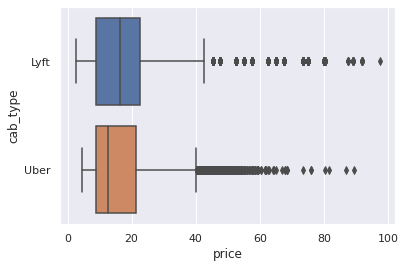

In [ ]:
sns.boxplot(x='price', y='cab_type', data=df)

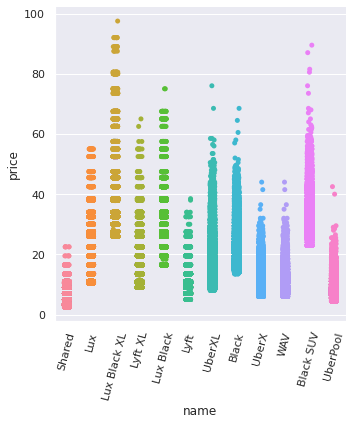

In [ ]:
ax = sns.catplot(x='name', y='price', data=df)
ax.set_xticklabels(rotation=75)
plt.show()

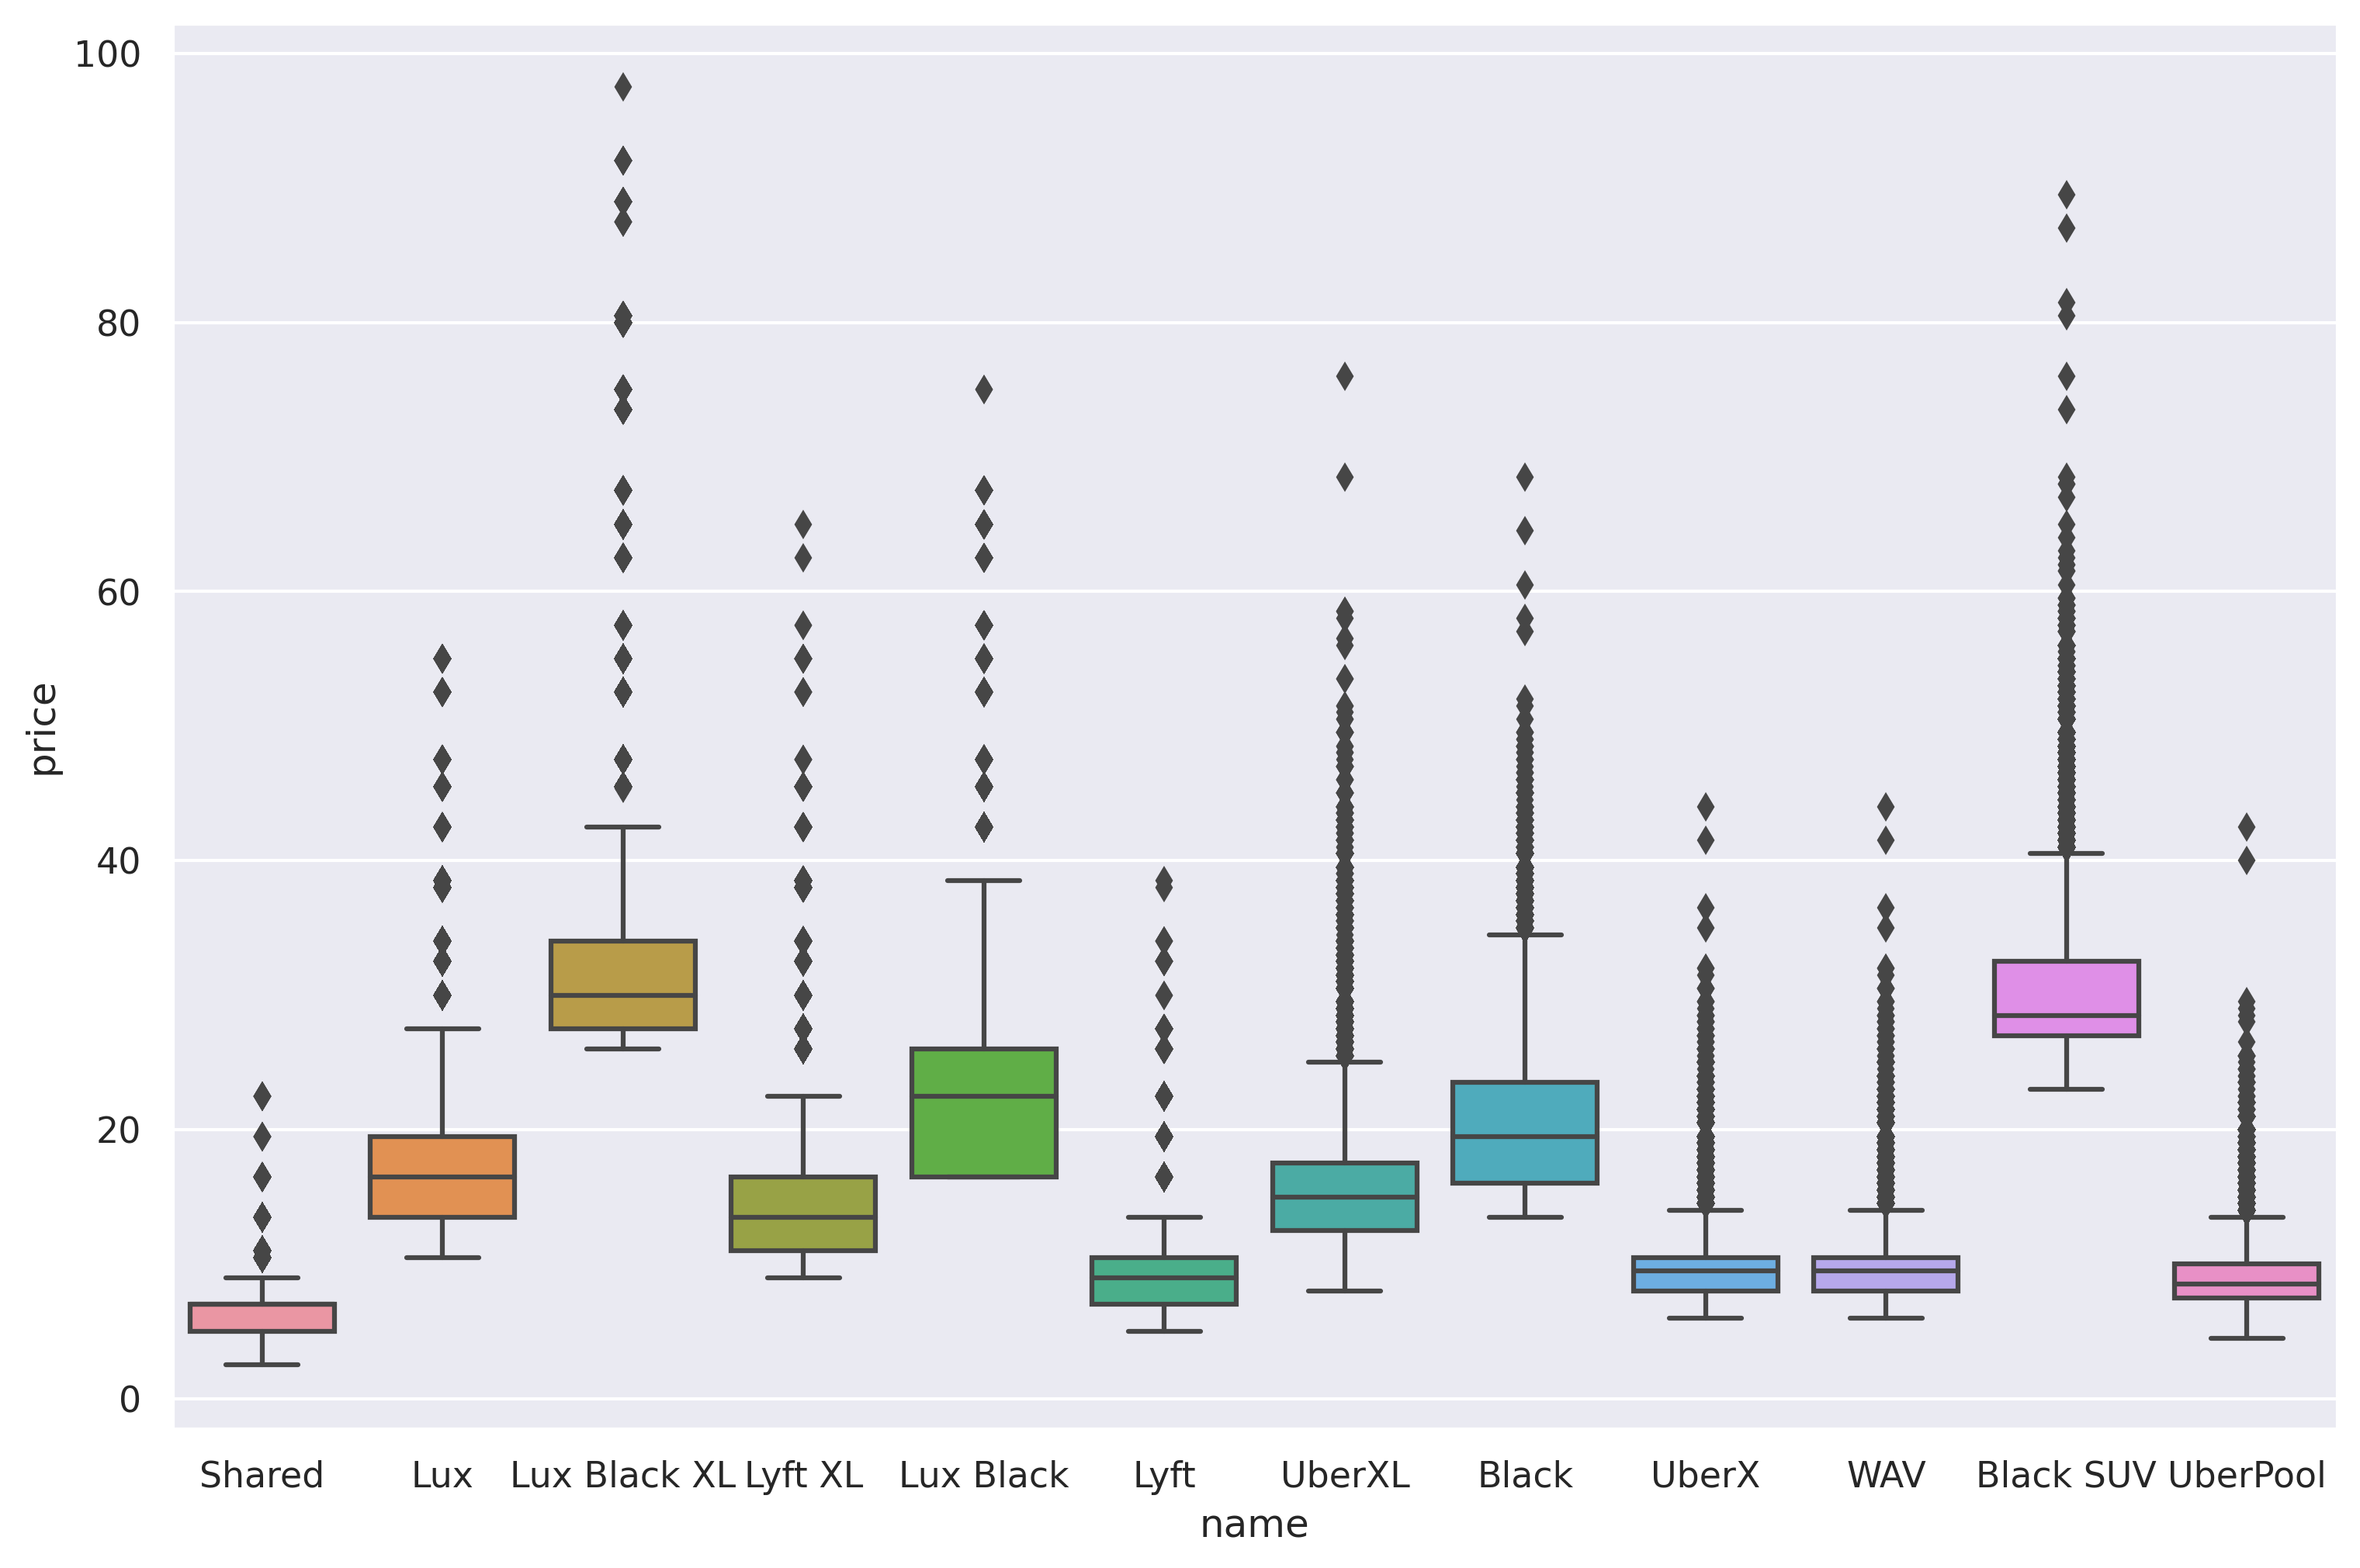

In [ ]:
plt.figure(dpi=300,figsize=(12, 8))
ax = sns.boxplot(x='name', y='price', data=df)
plt.show()
# So we can see that the different Visible type of the cab has big influences on the price

In [ ]:
# Distance and Source
gp_source = df.groupby('source').count().reset_index()
gp_source

,source,cab_type,name,distance,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
0,Back Bay,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992,52992
1,Beacon Hill,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666,52666
2,Boston University,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935,52935
3,Fenway,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929,52929
4,Financial District,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
5,Haymarket Square,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936,52936
6,North End,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931,52931
7,North Station,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312,52312
8,Northeastern University,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912,52912
9,South Station,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927,52927


Text(0, 0.5, 'Ride count')

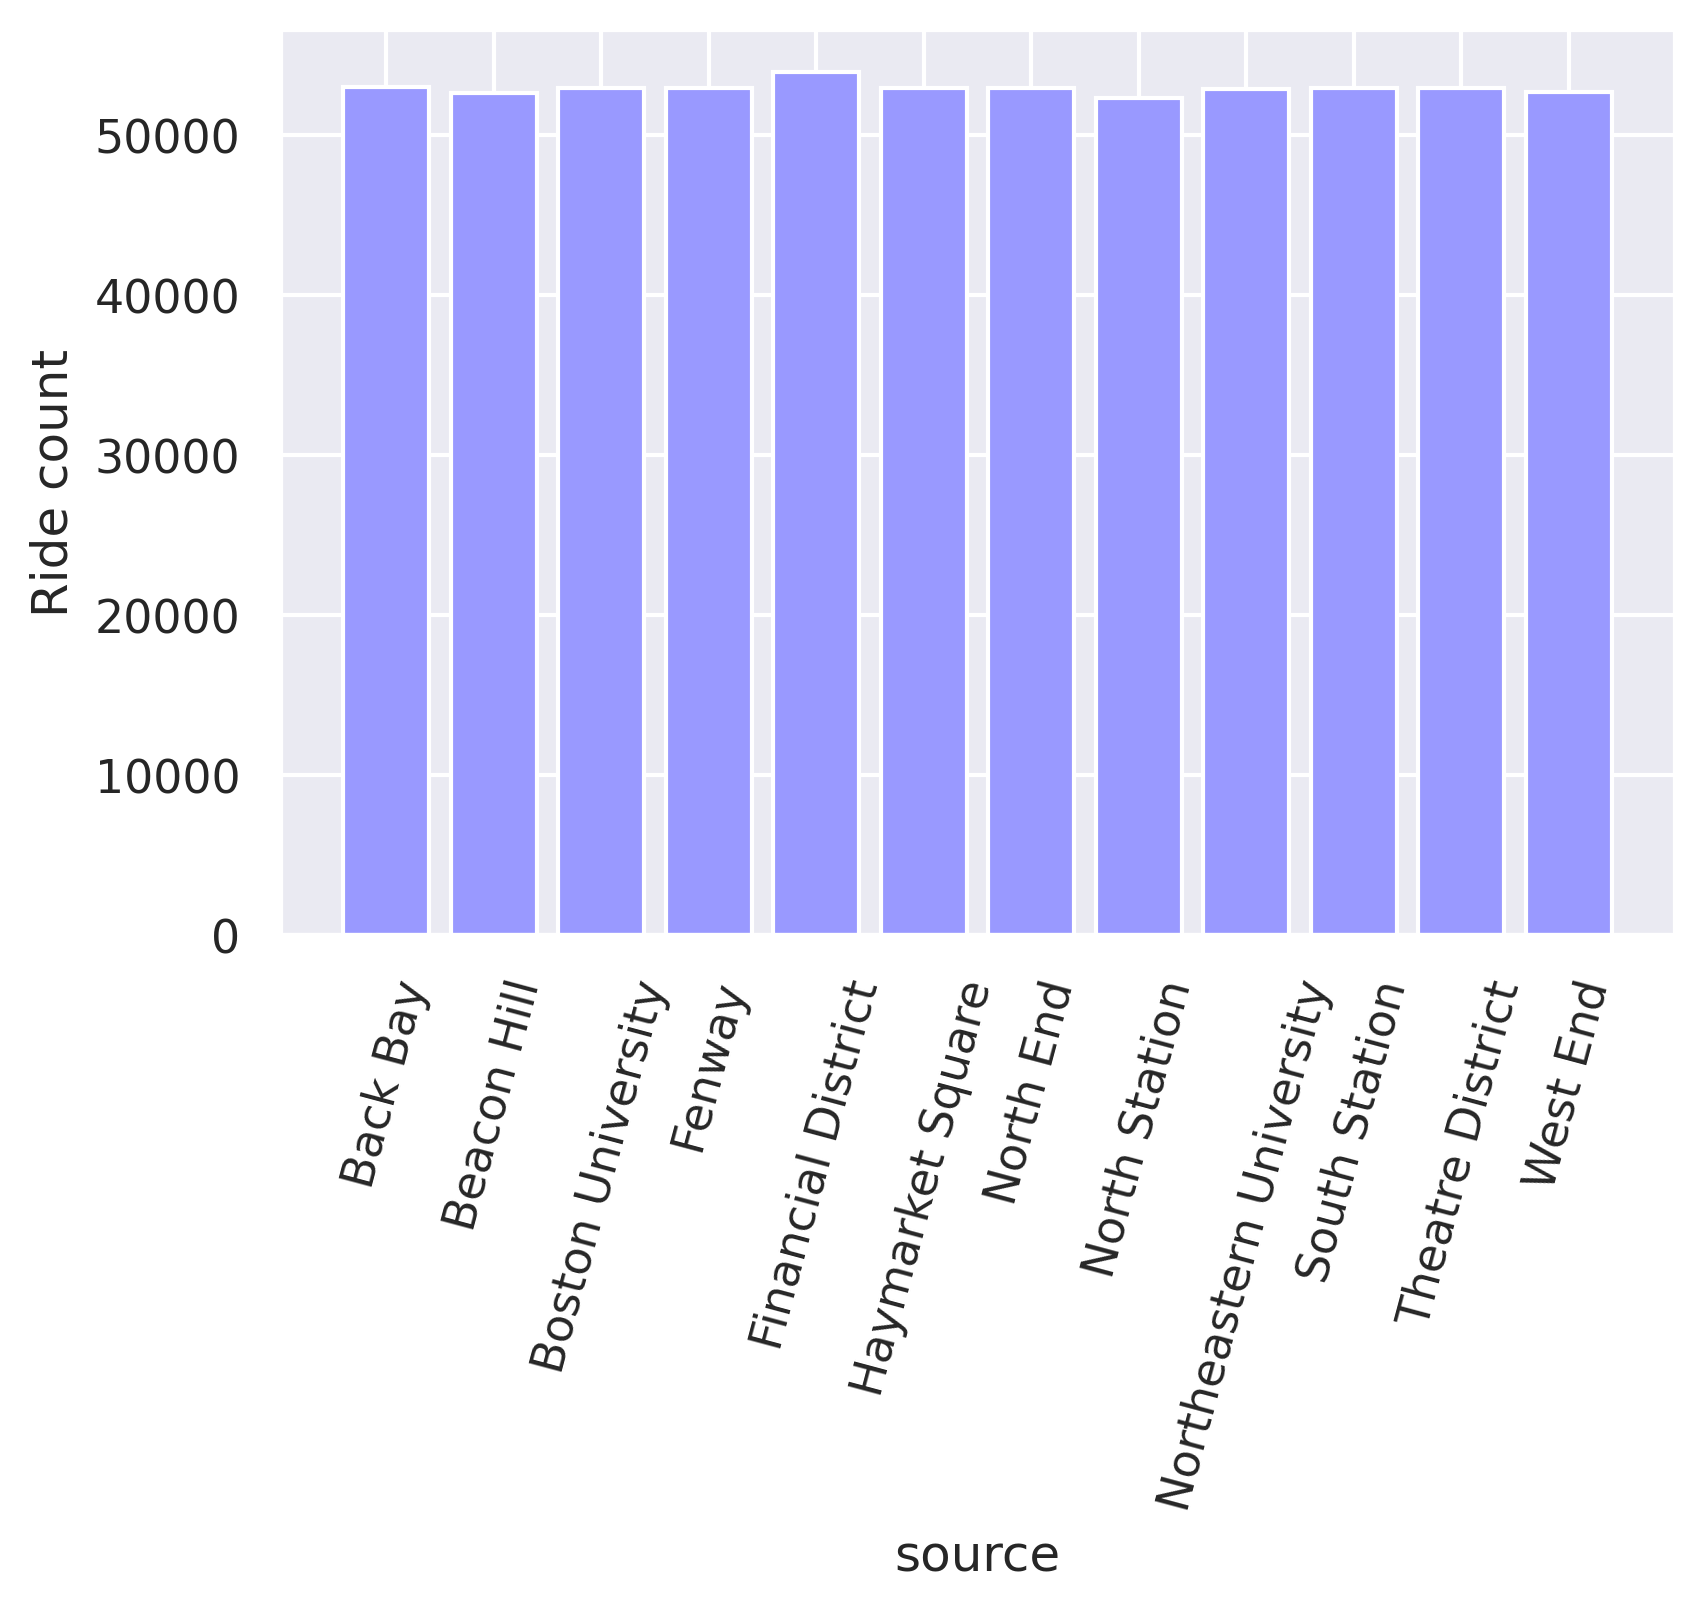

In [ ]:
X = np.arange(0,12,1)
Y = gp_source['cab_type']
plt.figure(dpi=300)
x_ticks = gp_source['source'].tolist()
plt.bar(X, Y, facecolor='#9999ff', tick_label = x_ticks)
plt.xticks(rotation=75)
plt.xlabel('source')
plt.ylabel('Ride count')

In [ ]:
gp_source = df.groupby('source').mean().reset_index()
gp_source

,source,distance,surge_multiplier,Month,Hour,temp,clouds,pressure,rain,humidity,wind,price
0,Back Bay,1.980677,1.029184,11.586315,11.616697,39.191169,0.674003,1010.248134,0.006628,0.748579,6.911662,16.044345
1,Beacon Hill,2.035270,1.017032,11.583526,11.515456,39.108600,0.669767,1010.168213,0.006826,0.751184,6.962487,15.663255
2,Boston University,3.051053,1.021852,11.588609,11.567583,39.169070,0.670399,1010.307316,0.006838,0.747070,6.853269,18.851705
3,Fenway,2.811773,1.023102,11.589034,11.745470,39.037436,0.669604,1010.387186,0.006147,0.749107,6.844886,18.379641
4,Financial District,2.707797,1.012152,11.585669,11.662699,39.581049,0.668742,1010.190092,0.006746,0.741406,6.958186,18.182625
5,Haymarket Square,1.119965,1.002366,11.588125,11.545432,39.260083,0.665876,1010.277812,0.006451,0.750326,6.956693,13.574883
6,North End,1.610148,1.002362,11.580378,11.633882,39.217102,0.675531,1010.075949,0.007552,0.749637,7.051835,15.151424
7,North Station,2.218476,1.005419,11.591050,11.698712,39.126911,0.670678,1010.350843,0.006645,0.748725,6.923455,16.365442
8,Northeastern University,2.722946,1.023336,11.580643,11.687368,39.146952,0.670000,1010.066733,0.006038,0.750287,6.886037,17.901428
9,South Station,1.842437,1.013811,11.580687,11.686493,39.464807,0.666754,1010.260705,0.006067,0.740170,6.965028,15.675298


Text(0, 0.5, 'Average Price per ride')

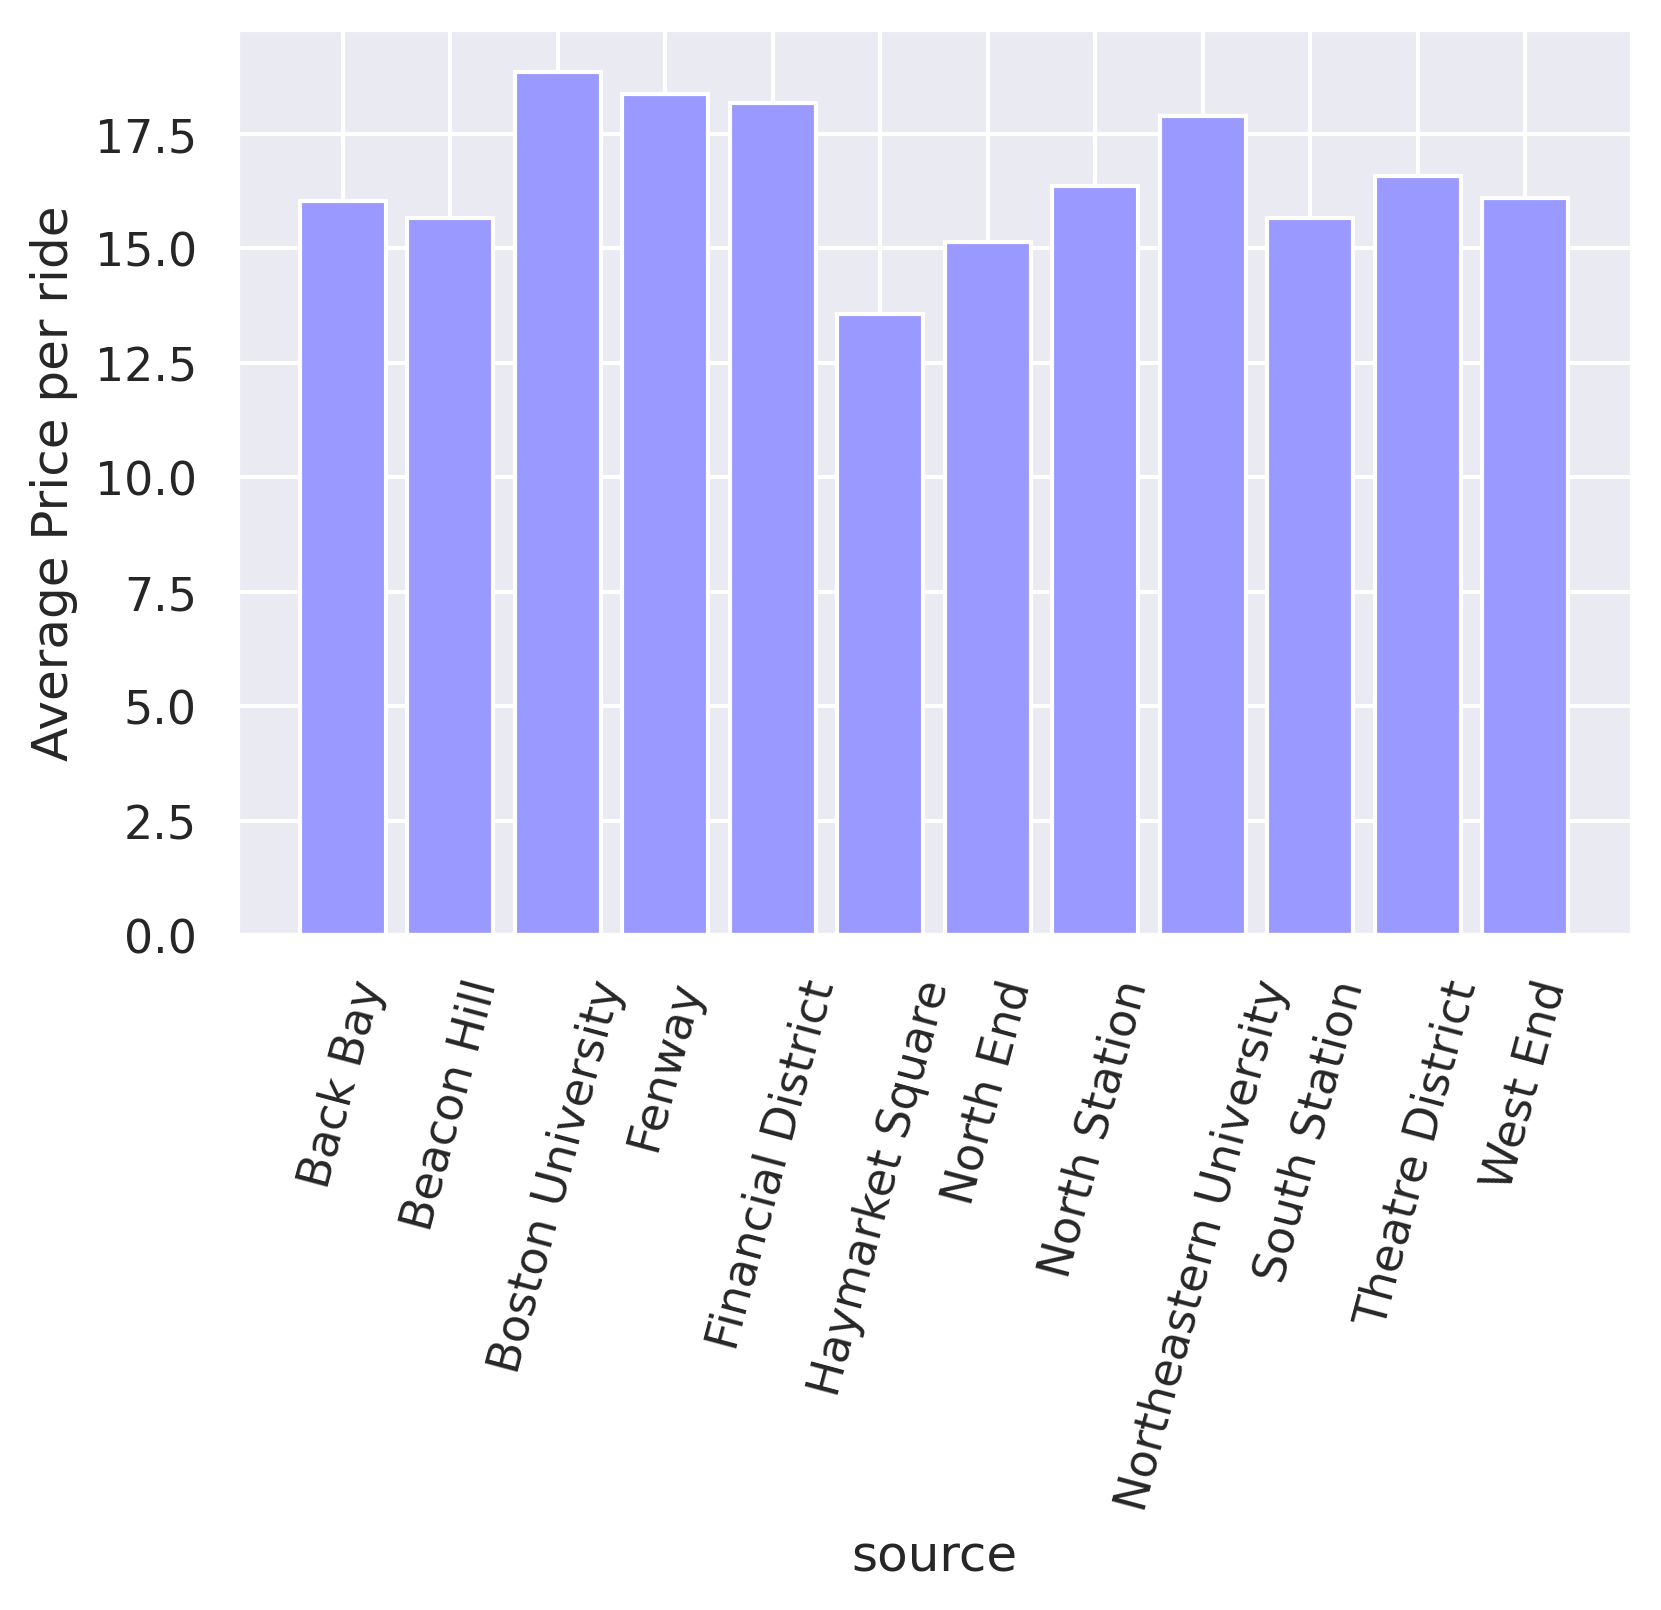

In [ ]:
# Source and Price
X = np.arange(0,12,1)
Y = gp_source['price']
plt.figure(dpi=300)
x_ticks = gp_source['source'].tolist()
plt.bar(X, Y, facecolor='#9999ff', tick_label = x_ticks)
plt.xticks(rotation=75)
plt.xlabel('source')
plt.ylabel('Average Price per ride')

In [ ]:
gp_desti = df.groupby('destination').mean().reset_index()
gp_desti

,destination,distance,surge_multiplier,Month,Hour,temp,clouds,pressure,rain,humidity,wind,price
0,Back Bay,2.084417,1.014981,11.581090,11.694928,39.241106,0.672572,1010.053010,0.007002,0.747555,6.996218,16.207575
1,Beacon Hill,2.214501,1.013425,11.585097,11.675056,39.149043,0.666160,1010.280097,0.006278,0.747040,6.916130,16.249354
2,Boston University,3.022853,1.016488,11.588113,11.647227,39.158953,0.670780,1010.175550,0.006630,0.748515,6.957632,18.942121
3,Fenway,2.865216,1.015545,11.592315,11.623622,39.278376,0.672403,1010.346740,0.006850,0.749874,6.948935,18.144213
4,Financial District,2.585123,1.014974,11.588261,11.628218,39.175570,0.667331,1010.363381,0.006219,0.746973,6.890957,18.046804
5,Haymarket Square,1.330755,1.015350,11.586655,11.640355,39.250140,0.670688,1010.197908,0.006795,0.747774,6.948066,14.251529
6,North End,1.637626,1.015989,11.583072,11.639549,39.135277,0.672587,1010.212372,0.006703,0.749433,6.963322,15.000746
7,North Station,2.225515,1.014752,11.581938,11.643182,39.320659,0.672496,1010.154247,0.006841,0.748605,6.938805,16.799473
8,Northeastern University,2.639572,1.015162,11.586722,11.708056,39.222692,0.670008,1010.217075,0.006697,0.749301,6.924572,17.824421
9,South Station,1.612404,1.015433,11.586674,11.511133,39.122798,0.663523,1010.275593,0.006920,0.747784,6.955595,14.832079


Text(0, 0.5, 'Average Price per ride')

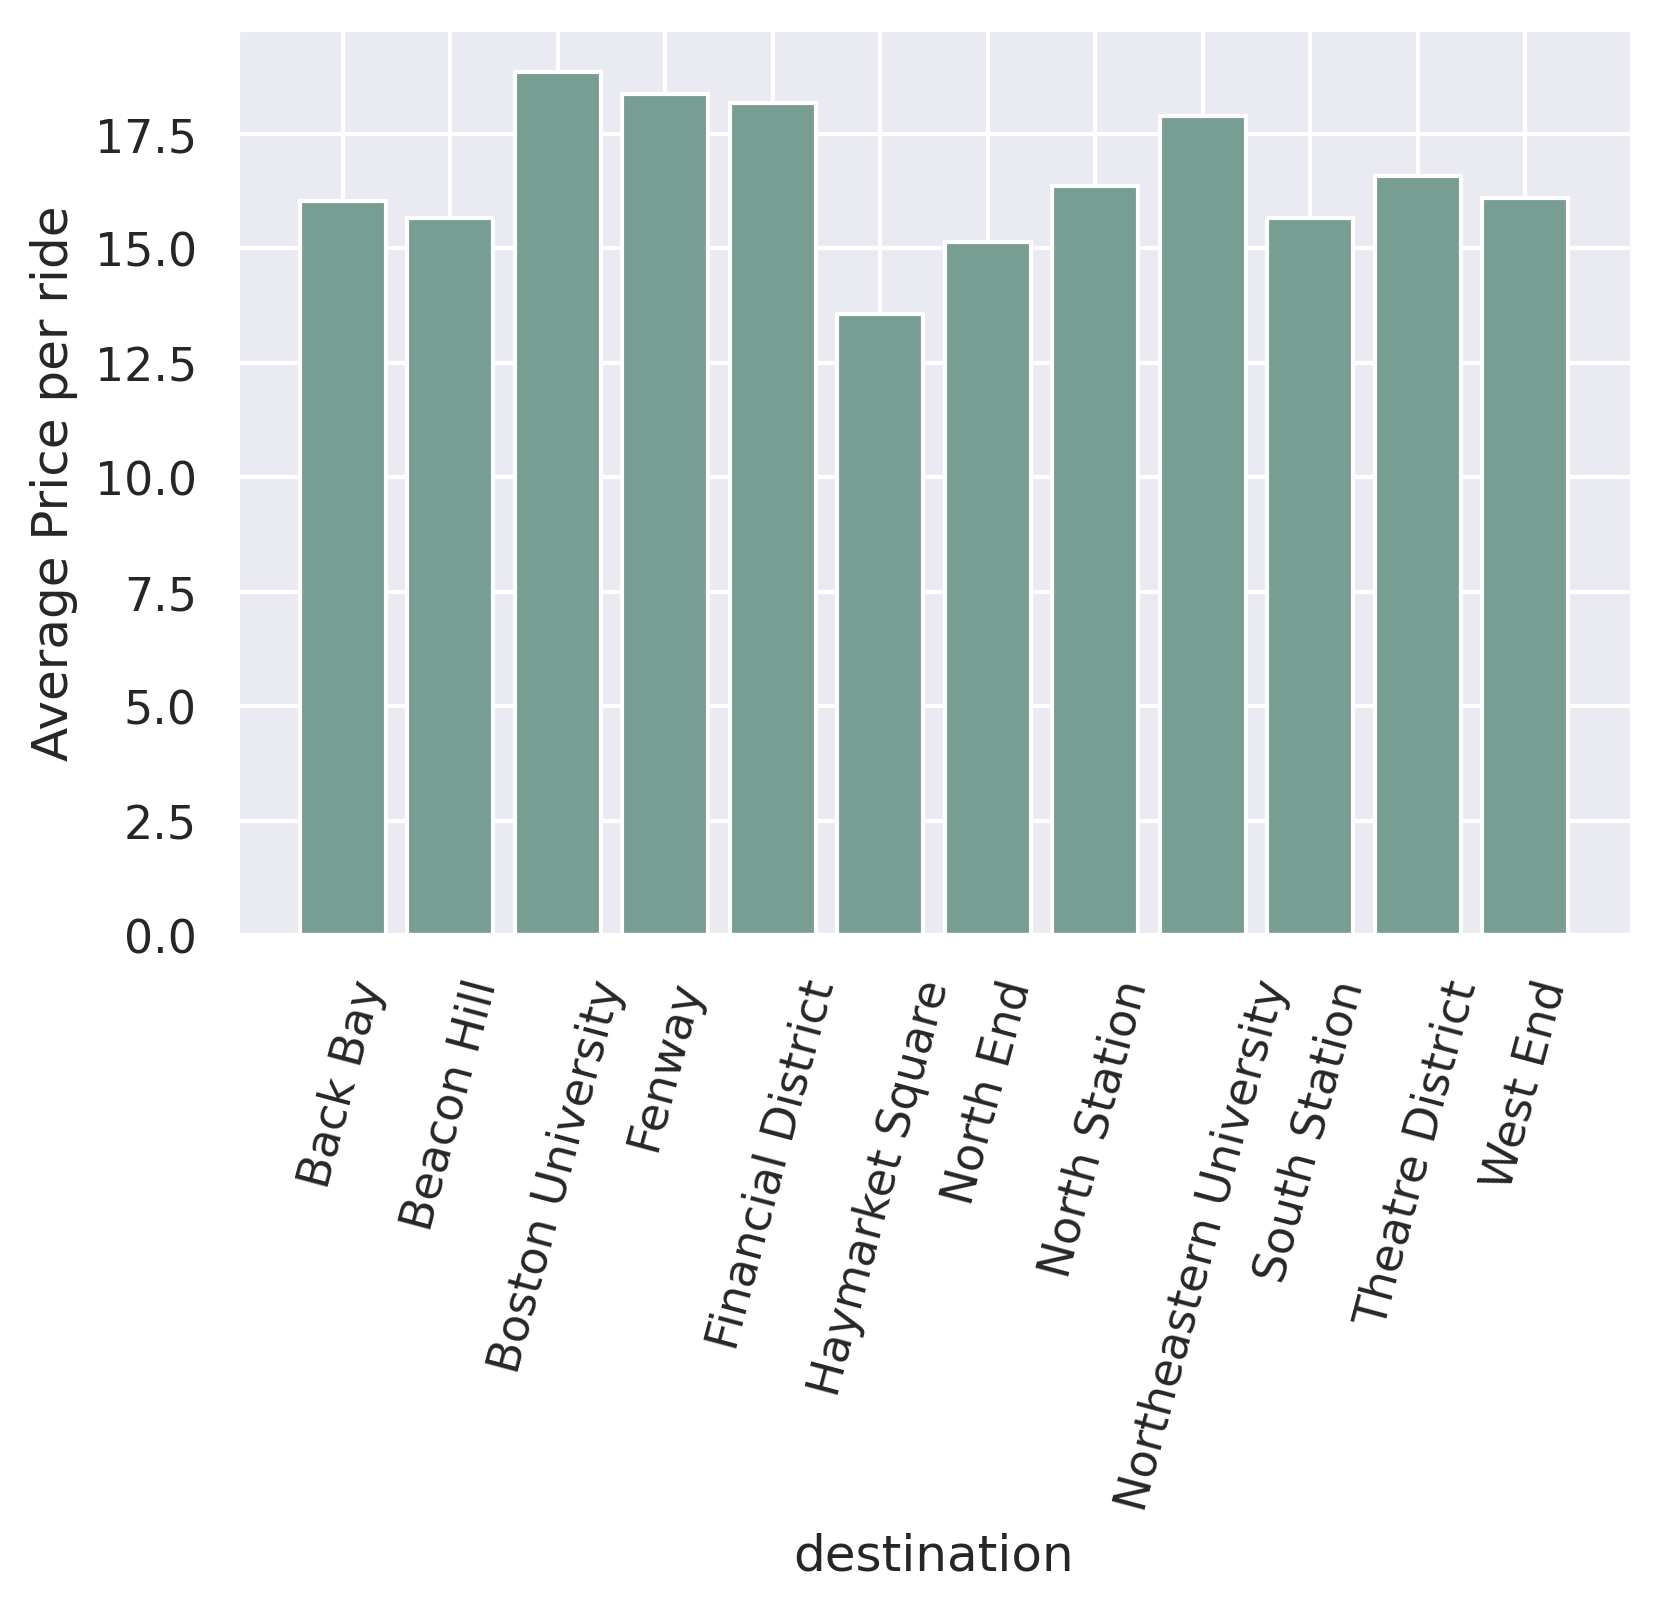

In [ ]:
# Destination and Price
X = np.arange(0,12,1)
Y = gp_source['price']
plt.figure(dpi=300)
x_ticks = gp_desti['destination'].tolist()
plt.bar(X, Y, facecolor='#789e93', tick_label = x_ticks)
plt.xticks(rotation=75)
plt.xlabel('destination')
plt.ylabel('Average Price per ride')

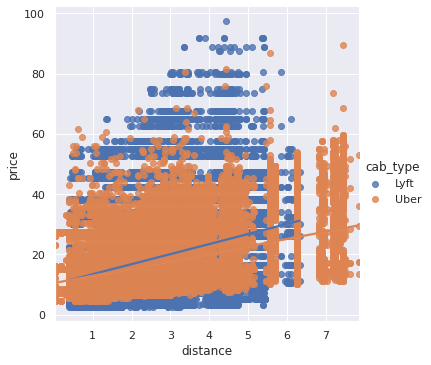

In [ ]:
# Distance and price
sns.lmplot(
    data=df,
    x="distance", y="price", hue="cab_type",
    height=5
)

# As we can see from the figure, the increase in distance has a greater impact on Lyft prices than on Uber prices.

In [ ]:
pd.crosstab(df.surge_multiplier, df.cab_type)

cab_type,Lyft,Uber
surge_multiplier,,
1.00,285197,329090
1.25,11042,0
1.50,5040,0
1.75,2408,0
2.00,2228,0
2.50,154,0
3.00,12,0


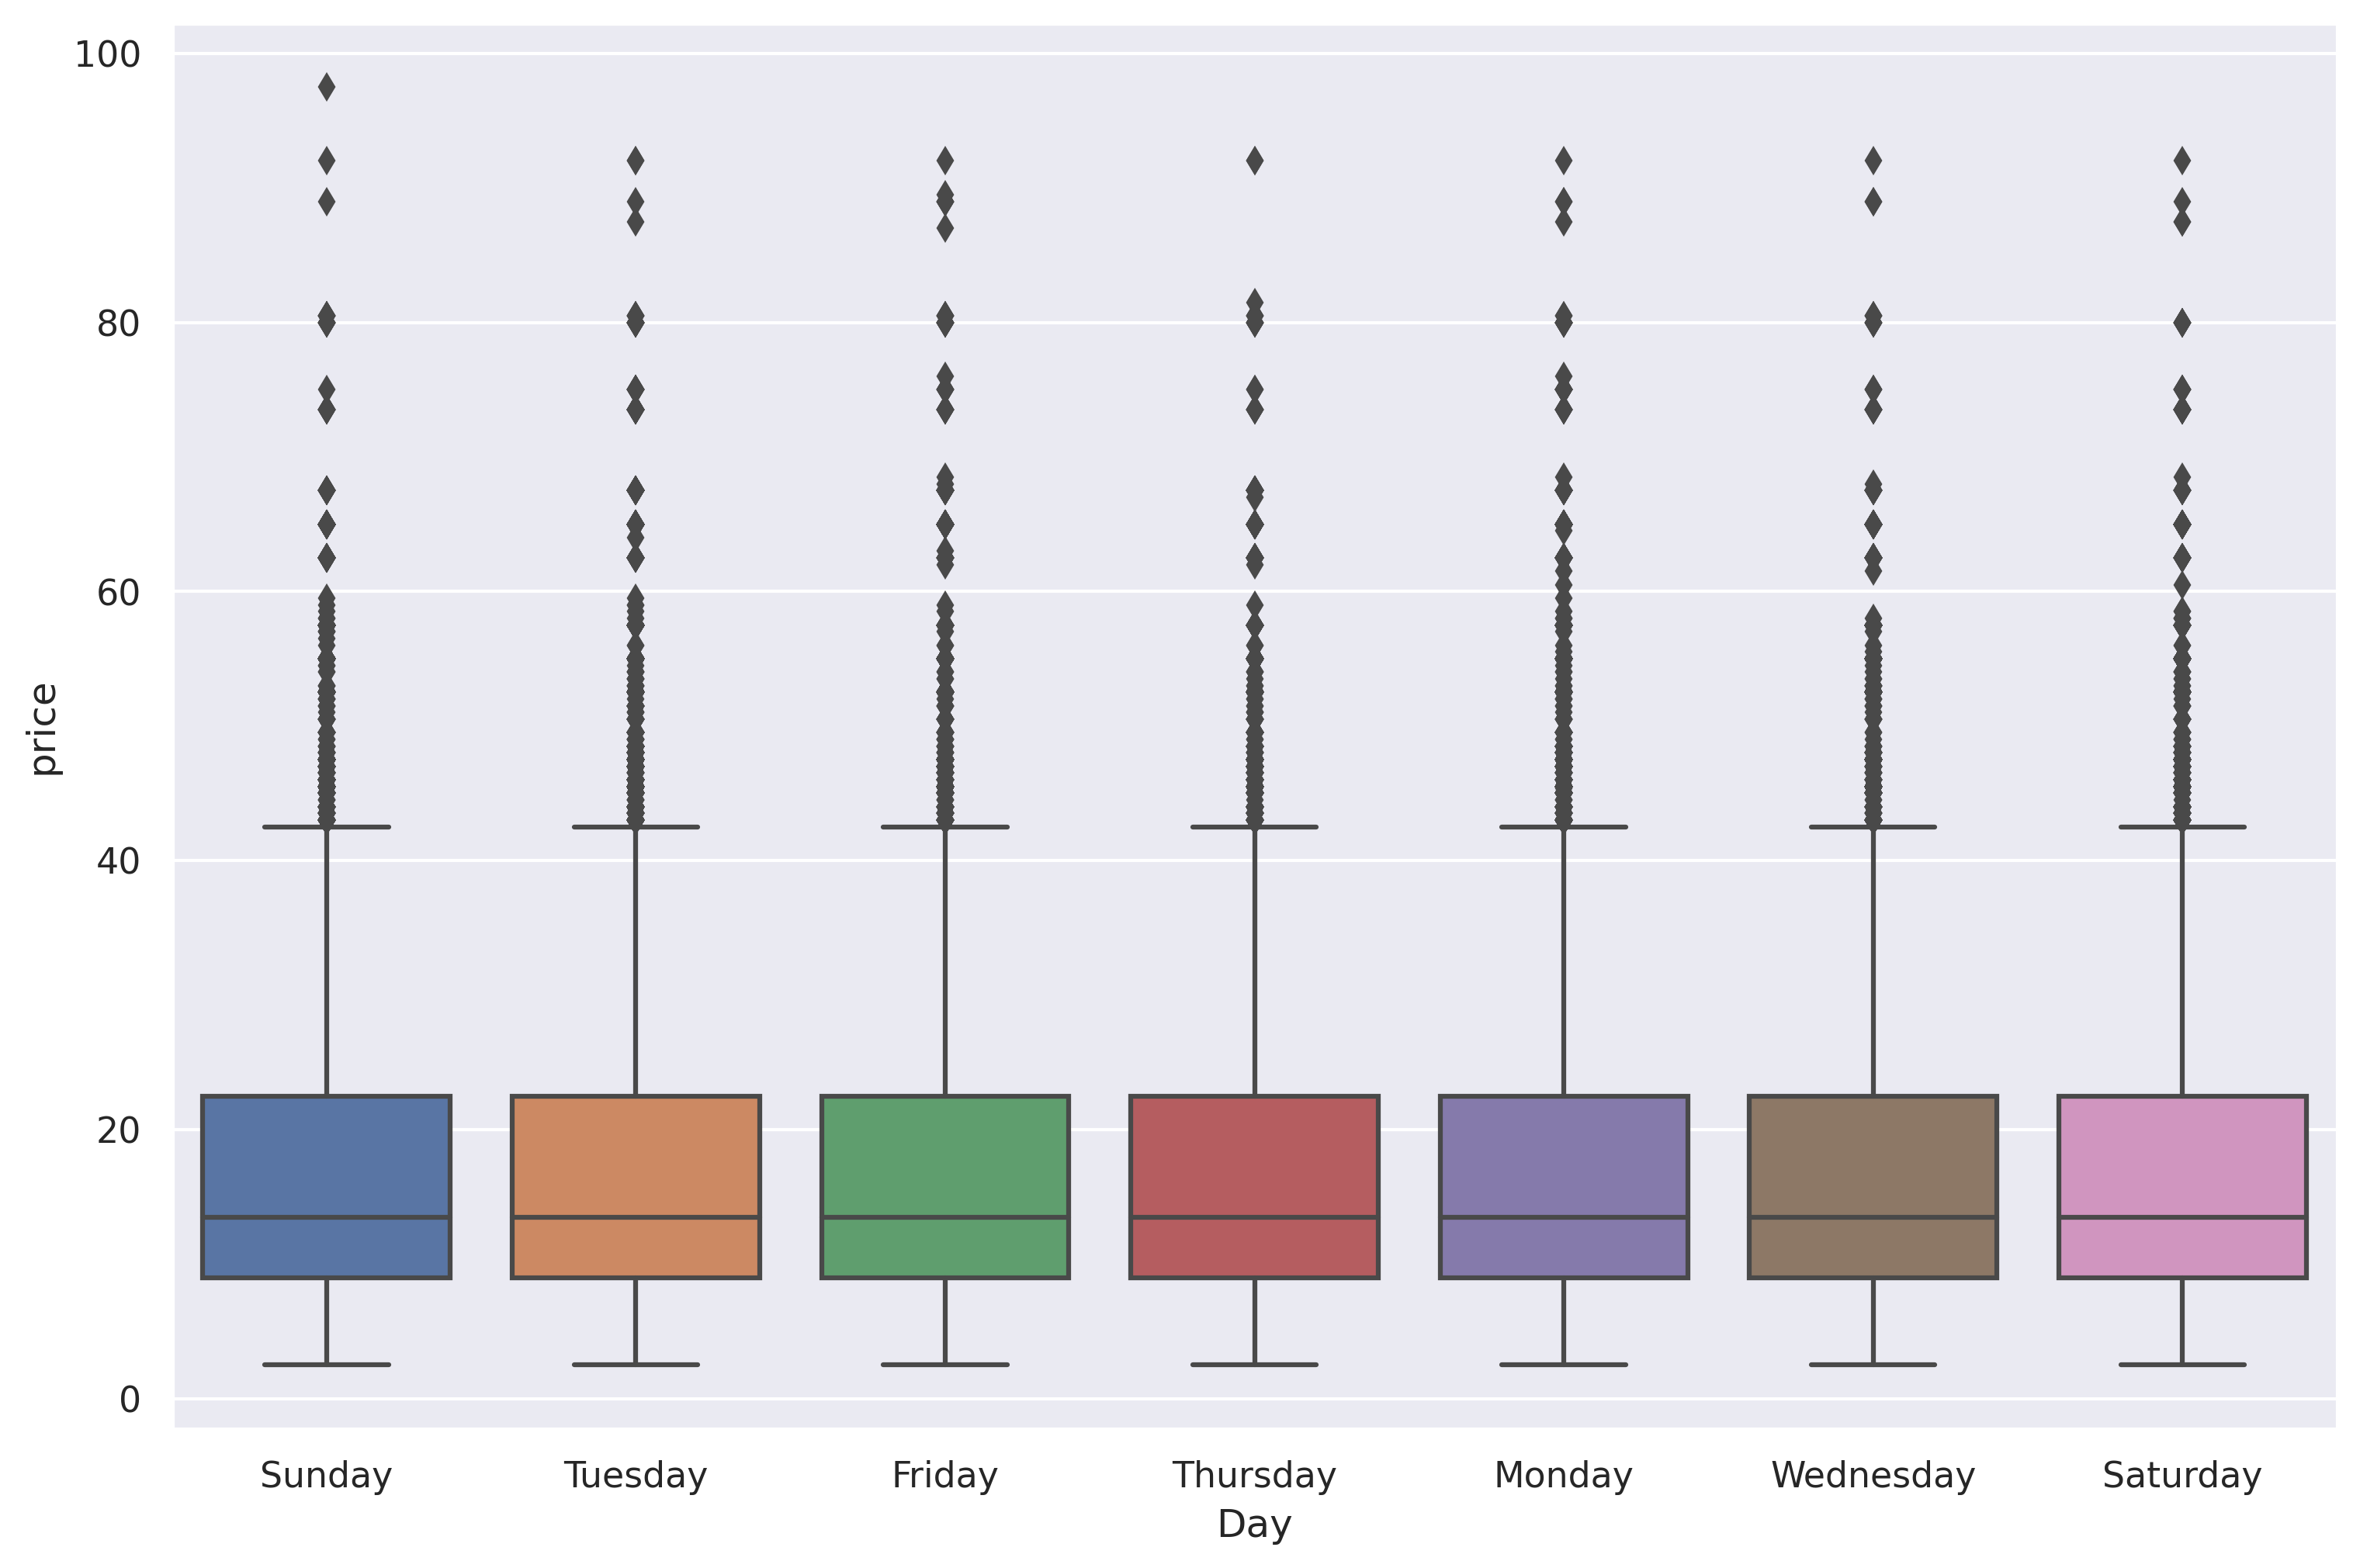

In [ ]:
# Day and Price
plt.figure(dpi=300,figsize=(12, 8))
ax = sns.boxplot(x='Day', y='price', data=df)
plt.show()

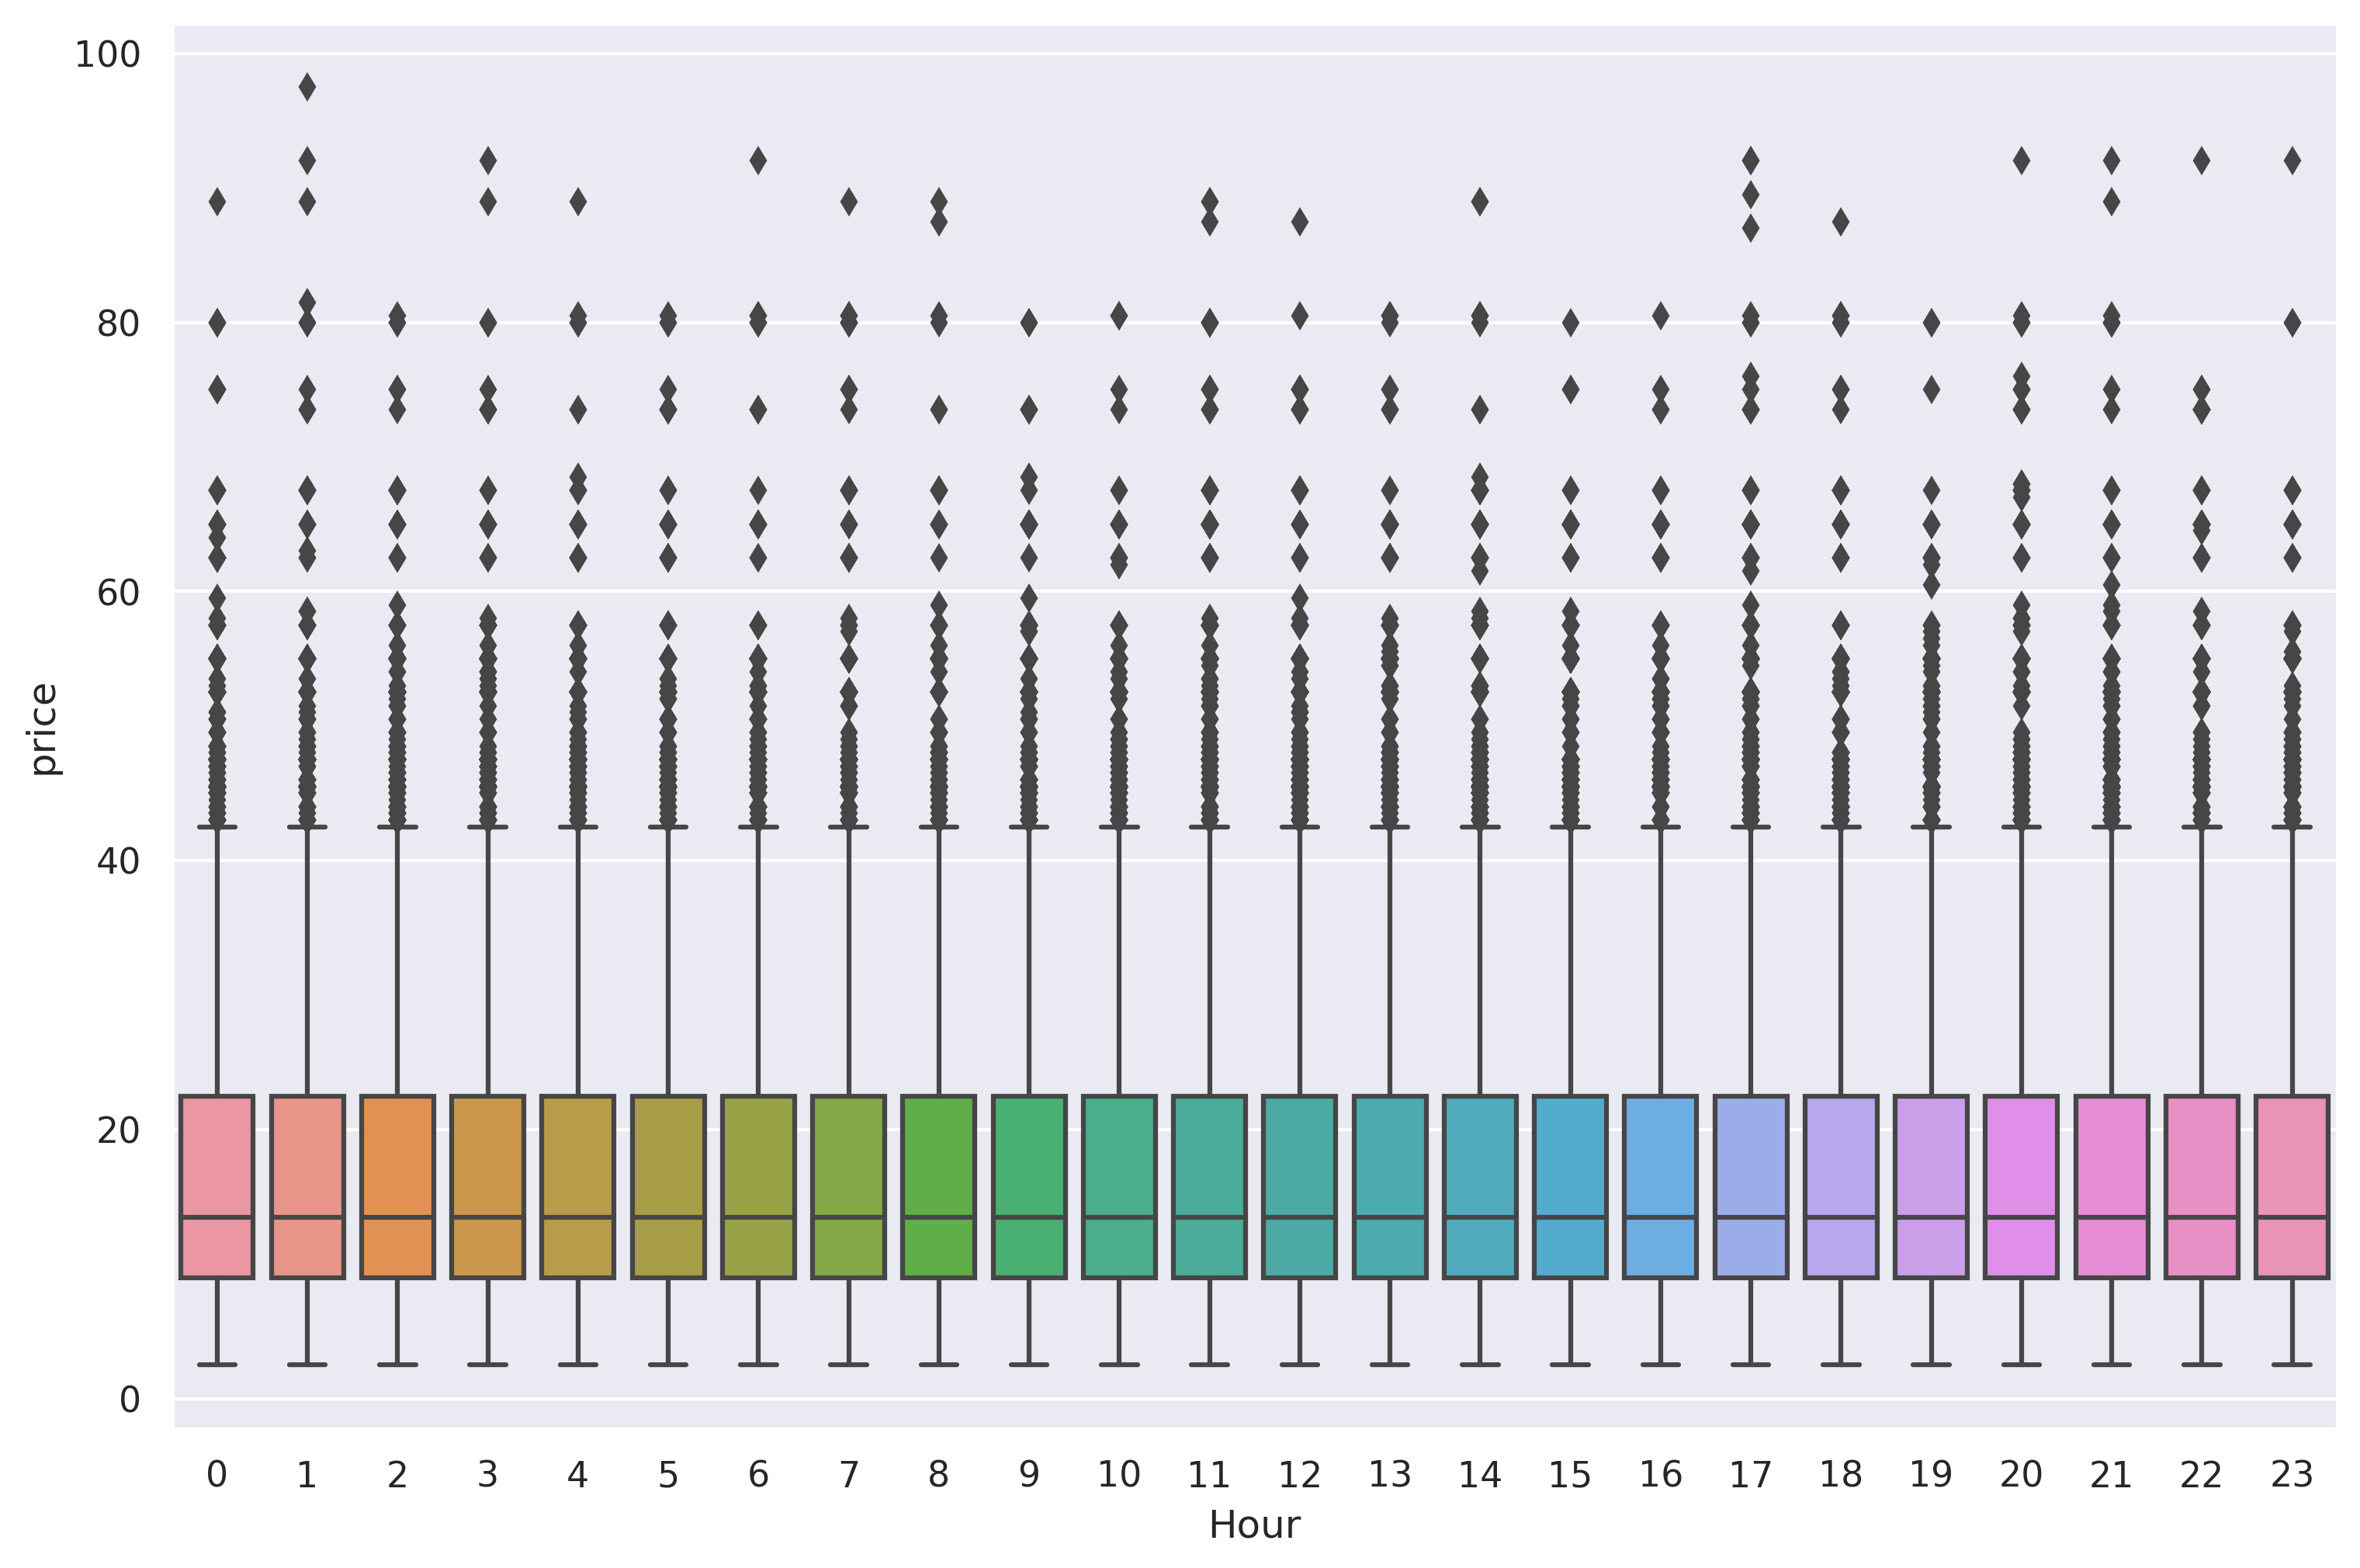

In [ ]:
# Hour and Price
plt.figure(dpi=300,figsize=(12, 8))
ax = sns.boxplot(x='Hour', y='price', data=df)
plt.show()

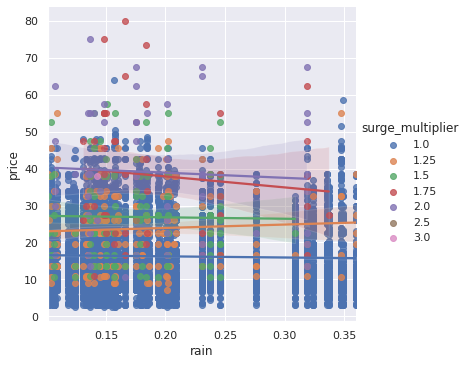

In [ ]:
rain = df[df['rain']>0.1]
sns.lmplot(
    data=rain,
    x="rain", y="price", hue="surge_multiplier",
    height=5
)

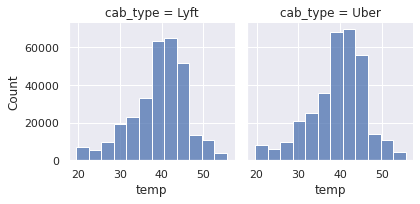

In [ ]:
# Plot the temperature distribution by cab_type
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="temp", col="cab_type",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

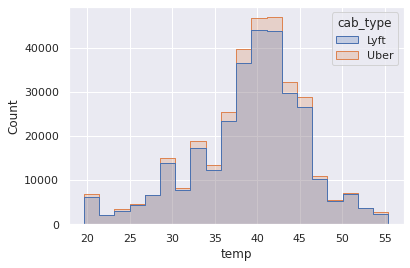

In [ ]:
sns.histplot(df, x="temp", hue="cab_type", element="step", bins = 20)

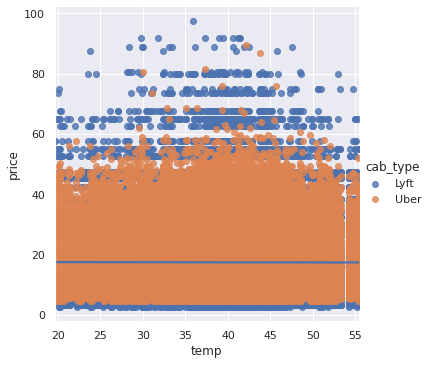

In [ ]:
sns.lmplot(
    data=df,
    x="temp", y="price", hue="cab_type",
    height=5
)

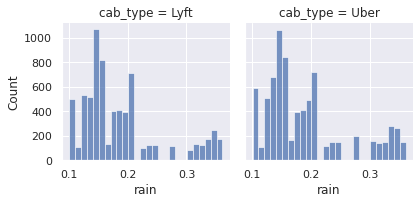

In [ ]:
# Plot the rain distribution by cab_type
rain = df[df['rain']>0.1]
sns.set_theme(style="darkgrid")
sns.displot(
    rain, x="rain", col="cab_type",
    binwidth=0.01, height=3, facet_kws=dict(margin_titles=True),
)

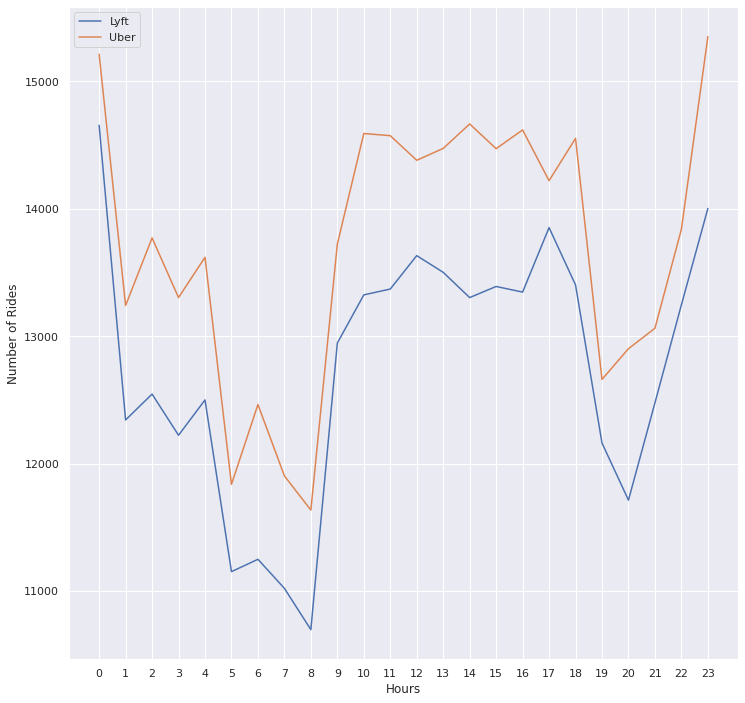

In [ ]:
# The ride distribution in one day 
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df[df['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df[df['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df[df['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df[df['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()

## 2.4 Data Transformation & Feature Engineering




In [ ]:
df.head()

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
0,Lyft,Shared,0.44,Haymarket Square,North Station,1.0,2018-12-16 09:30:07.890000105,12,9,Sunday,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,5.0
1,Lyft,Lux,0.44,Haymarket Square,North Station,1.0,2018-11-27 02:00:23.677000046,11,2,Tuesday,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,11.0
3,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,2018-11-30 04:53:02.749000072,11,4,Friday,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,26.0
4,Lyft,Lyft XL,0.44,Haymarket Square,North Station,1.0,2018-11-29 03:49:20.223000050,11,3,Thursday,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,9.0
5,Lyft,Lux Black,0.44,Haymarket Square,North Station,1.0,2018-12-17 18:25:12.138000011,12,18,Monday,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.15,0.000,0.790000,7.55,16.5


In [ ]:
df1 = df[['cab_type', 'name',	'distance',	'source',	'destination',	'surge_multiplier',	'Hour',	'temp',	'clouds',	'pressure',	'rain',	'humidity',	'wind', 'price']]
df1.head()

,cab_type,name,distance,source,destination,surge_multiplier,Hour,temp,clouds,pressure,rain,humidity,wind,price
0,Lyft,Shared,0.44,Haymarket Square,North Station,1.0,9,38.460,0.290000,1022.25,0.000,0.760000,7.68,5.0
1,Lyft,Lux,0.44,Haymarket Square,North Station,1.0,2,44.065,0.995000,1002.88,0.106,0.895000,12.63,11.0
3,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,4,35.080,0.000000,1013.71,0.000,0.700000,5.25,26.0
4,Lyft,Lyft XL,0.44,Haymarket Square,North Station,1.0,3,37.680,0.433333,998.42,0.000,0.706667,11.16,9.0
5,Lyft,Lux Black,0.44,Haymarket Square,North Station,1.0,18,40.780,0.930000,1000.15,0.000,0.790000,7.55,16.5


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635171 entries, 0 to 637975
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          635171 non-null  object 
 1   name              635171 non-null  object 
 2   distance          635171 non-null  float64
 3   source            635171 non-null  object 
 4   destination       635171 non-null  object 
 5   surge_multiplier  635171 non-null  float64
 6   Hour              635171 non-null  int64  
 7   temp              635171 non-null  float64
 8   clouds            635171 non-null  float64
 9   pressure          635171 non-null  float64
 10  rain              635171 non-null  float64
 11  humidity          635171 non-null  float64
 12  wind              635171 non-null  float64
 13  price             635171 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 92.7+ MB


In [ ]:
cab_mapping = {'Lyft':0, 'Uber':1}
df1['CabType'] = df['cab_type'].map(cab_mapping)
print(df1)

       cab_type          name  distance  ...   wind price  CabType
0          Lyft        Shared      0.44  ...   7.68   5.0        0
1          Lyft           Lux      0.44  ...  12.63  11.0        0
3          Lyft  Lux Black XL      0.44  ...   5.25  26.0        0
4          Lyft       Lyft XL      0.44  ...  11.16   9.0        0
5          Lyft     Lux Black      0.44  ...   7.55  16.5        0
...         ...           ...       ...  ...    ...   ...      ...
637971     Uber           WAV      1.00  ...   2.51   9.5        1
637972     Uber        UberXL      1.00  ...   2.51  13.0        1
637973     Uber         UberX      1.00  ...   2.51   9.5        1
637974     Uber     Black SUV      1.00  ...   2.51  27.0        1
637975     Uber      UberPool      1.00  ...   2.51  10.0        1

[635171 rows x 15 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
name_mapping = {'Black':0, 'Black SUV':1, 'Lux':2, 'Lux Black':3,'Lux Black XL':4, 'Lyft':5,'Lyft XL':6, 'Shared':7, 'UberPool':8, 'UberX':9,'UberXL':10, 'WAV':11}
df1['Name'] = df['name'].map(name_mapping)
print(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


       cab_type          name  distance  ... price CabType  Name
0          Lyft        Shared      0.44  ...   5.0       0     7
1          Lyft           Lux      0.44  ...  11.0       0     2
3          Lyft  Lux Black XL      0.44  ...  26.0       0     4
4          Lyft       Lyft XL      0.44  ...   9.0       0     6
5          Lyft     Lux Black      0.44  ...  16.5       0     3
...         ...           ...       ...  ...   ...     ...   ...
637971     Uber           WAV      1.00  ...   9.5       1    11
637972     Uber        UberXL      1.00  ...  13.0       1    10
637973     Uber         UberX      1.00  ...   9.5       1     9
637974     Uber     Black SUV      1.00  ...  27.0       1     1
637975     Uber      UberPool      1.00  ...  10.0       1     8

[635171 rows x 16 columns]


In [ ]:
source_mapping = {'Back Bay':0, 'Beacon Hill':1, 'Boston University':2, 'Fenway':3,'Financial District':4, 'Haymarket Square':5,'North End':6, 'North Station':7, 'Northeastern University':8, 'South Station':9,'Theatre District':10, 'West End':11}
df1['Source'] = df['source'].map(source_mapping)
print(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


       cab_type          name  distance  ... CabType Name  Source
0          Lyft        Shared      0.44  ...       0    7       5
1          Lyft           Lux      0.44  ...       0    2       5
3          Lyft  Lux Black XL      0.44  ...       0    4       5
4          Lyft       Lyft XL      0.44  ...       0    6       5
5          Lyft     Lux Black      0.44  ...       0    3       5
...         ...           ...       ...  ...     ...  ...     ...
637971     Uber           WAV      1.00  ...       1   11      11
637972     Uber        UberXL      1.00  ...       1   10      11
637973     Uber         UberX      1.00  ...       1    9      11
637974     Uber     Black SUV      1.00  ...       1    1      11
637975     Uber      UberPool      1.00  ...       1    8      11

[635171 rows x 17 columns]


In [ ]:
desti_mapping = {'Back Bay':0, 'Beacon Hill':1, 'Boston University':2, 'Fenway':3,'Financial District':4, 'Haymarket Square':5,'North End':6, 'North Station':7, 'Northeastern University':8, 'South Station':9,'Theatre District':10, 'West End':11}
df1['Desti'] = df['destination'].map(desti_mapping)
df1['Desti'].astype(int)
print(df1)

       cab_type          name  distance  ... Name Source  Desti
0          Lyft        Shared      0.44  ...    7      5      7
1          Lyft           Lux      0.44  ...    2      5      7
3          Lyft  Lux Black XL      0.44  ...    4      5      7
4          Lyft       Lyft XL      0.44  ...    6      5      7
5          Lyft     Lux Black      0.44  ...    3      5      7
...         ...           ...       ...  ...  ...    ...    ...
637971     Uber           WAV      1.00  ...   11     11      6
637972     Uber        UberXL      1.00  ...   10     11      6
637973     Uber         UberX      1.00  ...    9     11      6
637974     Uber     Black SUV      1.00  ...    1     11      6
637975     Uber      UberPool      1.00  ...    8     11      6

[635171 rows x 18 columns]


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635171 entries, 0 to 637975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          635171 non-null  object 
 1   name              635171 non-null  object 
 2   distance          635171 non-null  float64
 3   source            635171 non-null  object 
 4   destination       635171 non-null  object 
 5   surge_multiplier  635171 non-null  float64
 6   Hour              635171 non-null  int64  
 7   temp              635171 non-null  float64
 8   clouds            635171 non-null  float64
 9   pressure          635171 non-null  float64
 10  rain              635171 non-null  float64
 11  humidity          635171 non-null  float64
 12  wind              635171 non-null  float64
 13  price             635171 non-null  float64
 14  CabType           635171 non-null  int64  
 15  Name              635171 non-null  int64  
 16  Source            63

In [ ]:
df1.describe()

,distance,surge_multiplier,Hour,temp,clouds,pressure,rain,humidity,wind,price,CabType,Name,Source,Desti
count,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000,635171.000000
mean,2.188897,1.015066,11.636358,39.205323,0.669847,1010.233414,0.006641,0.748273,6.937990,16.544135,0.518112,5.536290,5.495849,5.496227
std,1.135333,0.095418,6.945750,6.604905,0.312390,13.375353,0.031365,0.128903,3.645129,9.323475,0.499672,3.493615,3.450156,3.449789
min,0.020000,1.000000,0.000000,19.620000,0.000000,988.325000,0.000000,0.450000,0.300000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.270000,1.000000,6.000000,36.040000,0.430000,999.950000,0.000000,0.650000,3.620000,9.000000,0.000000,2.000000,3.000000,3.000000
50%,2.160000,1.000000,12.000000,40.180000,0.760000,1009.450000,0.000000,0.730000,6.740000,13.500000,1.000000,6.000000,5.000000,5.000000
75%,2.930000,1.000000,18.000000,43.805000,0.960000,1021.870000,0.000000,0.874000,9.852500,22.500000,1.000000,9.000000,8.000000,8.000000
max,7.860000,3.000000,23.000000,55.410000,1.000000,1035.120000,0.359825,0.990000,18.180000,97.500000,1.000000,11.000000,11.000000,11.000000


In [ ]:
df2 = df1.drop(columns=['cab_type', 'name', 'source', 'destination'])
df2[['Hour', 'CabType',	'Name',	'Source',	'Desti']] = df2[['Hour', 'CabType',	'Name',	'Source',	'Desti']].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635171 entries, 0 to 637975
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   distance          635171 non-null  float64 
 1   surge_multiplier  635171 non-null  float64 
 2   Hour              635171 non-null  category
 3   temp              635171 non-null  float64 
 4   clouds            635171 non-null  float64 
 5   pressure          635171 non-null  float64 
 6   rain              635171 non-null  float64 
 7   humidity          635171 non-null  float64 
 8   wind              635171 non-null  float64 
 9   price             635171 non-null  float64 
 10  CabType           635171 non-null  category
 11  Name              635171 non-null  category
 12  Source            635171 non-null  category
 13  Desti             635171 non-null  category
dtypes: category(5), float64(9)
memory usage: 71.5 MB


# 3. Feature Selection

In [ ]:
df.head()

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
0,Lyft,Shared,0.44,Haymarket Square,North Station,1.0,2018-12-16 09:30:07.890000105,12,9,Sunday,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.25,0.000,0.760000,7.68,5.0
1,Lyft,Lux,0.44,Haymarket Square,North Station,1.0,2018-11-27 02:00:23.677000046,11,2,Tuesday,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.88,0.106,0.895000,12.63,11.0
3,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,2018-11-30 04:53:02.749000072,11,4,Friday,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.71,0.000,0.700000,5.25,26.0
4,Lyft,Lyft XL,0.44,Haymarket Square,North Station,1.0,2018-11-29 03:49:20.223000050,11,3,Thursday,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.42,0.000,0.706667,11.16,9.0
5,Lyft,Lux Black,0.44,Haymarket Square,North Station,1.0,2018-12-17 18:25:12.138000011,12,18,Monday,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.15,0.000,0.790000,7.55,16.5


In [ ]:
uber = df[df.cab_type == 'Uber']
lyft = df[df.cab_type == 'Lyft']

In [ ]:
uber

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
12,Uber,UberXL,1.11,North End,West End,1.0,2018-11-30 22:13:01.178999901,11,22,Friday,North End - 2018-11-30 - 22,38.65,0.96,1017.23,0.0000,0.65,3.13,12.0
13,Uber,Black,1.11,North End,West End,1.0,2018-12-13 10:50:11.013999939,12,10,Thursday,North End - 2018-12-13 - 10,20.12,0.43,1031.07,0.0000,0.64,3.88,16.0
14,Uber,UberX,1.11,North End,West End,1.0,2018-12-13 19:15:03.934999943,12,19,Thursday,North End - 2018-12-13 - 19,32.75,0.51,1033.75,0.0000,0.57,1.90,7.5
15,Uber,WAV,1.11,North End,West End,1.0,2018-12-16 23:55:11.430000067,12,23,Sunday,North End - 2018-12-16 - 23,42.36,1.00,1012.15,0.2088,0.77,11.46,7.5
16,Uber,Black SUV,1.11,North End,West End,1.0,2018-12-14 00:40:07.960999966,12,0,Friday,North End - 2018-12-14 - 0,30.07,0.69,1034.97,0.0000,0.68,1.98,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,Uber,WAV,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0000,0.76,2.51,9.5
637972,Uber,UberXL,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0000,0.76,2.51,13.0
637973,Uber,UberX,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0000,0.76,2.51,9.5
637974,Uber,Black SUV,1.00,West End,North End,1.0,2018-12-01 23:53:05.533999919,12,23,Saturday,West End - 2018-12-01 - 23,36.69,0.41,1023.64,0.0000,0.76,2.51,27.0


In [ ]:
lyft

,cab_type,name,distance,source,destination,surge_multiplier,Time,Month,Hour,Day,merged_date,temp,clouds,pressure,rain,humidity,wind,price
0,Lyft,Shared,0.44,Haymarket Square,North Station,1.0,2018-12-16 09:30:07.890000105,12,9,Sunday,Haymarket Square - 2018-12-16 - 9,38.460,0.290000,1022.250,0.00000,0.760000,7.680,5.0
1,Lyft,Lux,0.44,Haymarket Square,North Station,1.0,2018-11-27 02:00:23.677000046,11,2,Tuesday,Haymarket Square - 2018-11-27 - 2,44.065,0.995000,1002.880,0.10600,0.895000,12.630,11.0
3,Lyft,Lux Black XL,0.44,Haymarket Square,North Station,1.0,2018-11-30 04:53:02.749000072,11,4,Friday,Haymarket Square - 2018-11-30 - 4,35.080,0.000000,1013.710,0.00000,0.700000,5.250,26.0
4,Lyft,Lyft XL,0.44,Haymarket Square,North Station,1.0,2018-11-29 03:49:20.223000050,11,3,Thursday,Haymarket Square - 2018-11-29 - 3,37.680,0.433333,998.420,0.00000,0.706667,11.160,9.0
5,Lyft,Lux Black,0.44,Haymarket Square,North Station,1.0,2018-12-17 18:25:12.138000011,12,18,Monday,Haymarket Square - 2018-12-17 - 18,40.780,0.930000,1000.150,0.00000,0.790000,7.550,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637951,Lyft,Lyft XL,3.11,Theatre District,Fenway,1.0,2018-11-29 01:03:40.023000002,11,1,Thursday,Theatre District - 2018-11-29 - 1,38.301,0.619000,997.487,0.00013,0.714000,10.246,16.5
637952,Lyft,Lux,3.11,Theatre District,Fenway,1.0,2018-11-29 01:03:40.023000002,11,1,Thursday,Theatre District - 2018-11-29 - 1,38.301,0.619000,997.487,0.00013,0.714000,10.246,22.5
637956,Lyft,Shared,3.11,Theatre District,Fenway,1.0,2018-11-29 01:47:08.122999907,11,1,Thursday,Theatre District - 2018-11-29 - 1,38.301,0.619000,997.487,0.00013,0.714000,10.246,7.0
637958,Lyft,Lyft,3.11,Theatre District,Fenway,1.0,2018-11-29 01:47:08.122999907,11,1,Thursday,Theatre District - 2018-11-29 - 1,38.301,0.619000,997.487,0.00013,0.714000,10.246,10.5


In [ ]:
X_u = uber.drop(columns=['price', 'Time','Month','Day','merged_date', 'Hour'])
X_l = lyft.drop(columns=['price', 'Time','Month','Day','merged_date', 'Hour'])

y_u = uber['price']
y_l = lyft['price']

## Generating Dummy Variables

In [ ]:
feature_u = pd.get_dummies(X_u, prefix='U')
feature_u

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,U_Uber,U_Black,U_Black SUV,U_UberPool,U_UberX,U_UberXL,U_WAV,U_Back Bay,U_Beacon Hill,U_Boston University,U_Fenway,U_Financial District,U_Haymarket Square,U_North End,U_North Station,U_Northeastern University,U_South Station,U_Theatre District,U_West End,U_Back Bay,U_Beacon Hill,U_Boston University,U_Fenway,U_Financial District,U_Haymarket Square,U_North End,U_North Station,U_Northeastern University,U_South Station,U_Theatre District,U_West End
12,1.11,1.0,38.65,0.96,1017.23,0.0000,0.65,3.13,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,1.11,1.0,20.12,0.43,1031.07,0.0000,0.64,3.88,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14,1.11,1.0,32.75,0.51,1033.75,0.0000,0.57,1.90,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15,1.11,1.0,42.36,1.00,1012.15,0.2088,0.77,11.46,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16,1.11,1.0,30.07,0.69,1034.97,0.0000,0.68,1.98,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,1.0,36.69,0.41,1023.64,0.0000,0.76,2.51,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
637972,1.00,1.0,36.69,0.41,1023.64,0.0000,0.76,2.51,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
637973,1.00,1.0,36.69,0.41,1023.64,0.0000,0.76,2.51,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
637974,1.00,1.0,36.69,0.41,1023.64,0.0000,0.76,2.51,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
feature_l = pd.get_dummies(X_l, prefix='L')
feature_l

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,L_Lyft,L_Lux,L_Lux Black,L_Lux Black XL,L_Lyft,L_Lyft XL,L_Shared,L_Back Bay,L_Beacon Hill,L_Boston University,L_Fenway,L_Financial District,L_Haymarket Square,L_North End,L_North Station,L_Northeastern University,L_South Station,L_Theatre District,L_West End,L_Back Bay,L_Beacon Hill,L_Boston University,L_Fenway,L_Financial District,L_Haymarket Square,L_North End,L_North Station,L_Northeastern University,L_South Station,L_Theatre District,L_West End
0,0.44,1.0,38.460,0.290000,1022.250,0.00000,0.760000,7.680,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,44.065,0.995000,1002.880,0.10600,0.895000,12.630,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.44,1.0,35.080,0.000000,1013.710,0.00000,0.700000,5.250,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.44,1.0,37.680,0.433333,998.420,0.00000,0.706667,11.160,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0.44,1.0,40.780,0.930000,1000.150,0.00000,0.790000,7.550,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637951,3.11,1.0,38.301,0.619000,997.487,0.00013,0.714000,10.246,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
637952,3.11,1.0,38.301,0.619000,997.487,0.00013,0.714000,10.246,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
637956,3.11,1.0,38.301,0.619000,997.487,0.00013,0.714000,10.246,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
637958,3.11,1.0,38.301,0.619000,997.487,0.00013,0.714000,10.246,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


# 4. Modelling

## Split the dataset

In [ ]:
# X: feature_u, feature_l
# y: y_u, y_l
X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(
    feature_u, y_u, test_size=0.20, random_state=325)
#train test split
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(
    feature_l, y_l, test_size=0.20, random_state=325)

## 4.1 Linear Regression

### Linear Regression: Uber

Linear Regression Uber train R squared: 0.9214
Linear Regression Uber test R squared: 0.9203
Linear Regression Uber test RMSE: 2.4144
Uber Accuracy: 88.39 %.


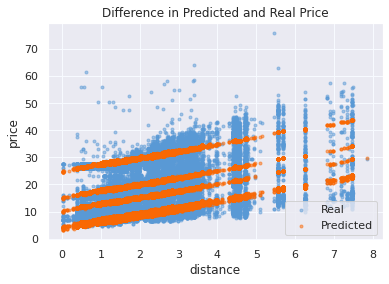

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

lr = LinearRegression() 
model = lr.fit(X_u_train, y_u_train)
y_u_prediction = model.predict(X_u_test)
lr_train_r2_u = lr.score(X_u_train, y_u_train)
lr_test_r2_u = lr.score(X_u_test, y_u_test)
print('Linear Regression Uber train R squared: %.4f' % lr_train_r2_u)
print('Linear Regression Uber test R squared: %.4f' % lr_test_r2_u)

lr_mse_u = mean_squared_error(y_u_prediction, y_u_test)
lr_rmse_u = np.sqrt(lr_mse_u)
print('Linear Regression Uber test RMSE: %.4f' % lr_rmse_u)

errors = abs(y_u_prediction - y_u_test)
mape = 100 * (errors / y_u_test)
accuracy_lr_u = 100 - np.mean(mape)
print('Uber Accuracy:', round(accuracy_lr_u, 2), '%.')

# Define x axis
x_axis = X_u_test.distance 

# Build scatterplot
plt.scatter(x_axis, y_u_test, c = '#5999D5', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_u_prediction, c = '#FA6804', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#f7faff', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()


### Linear Regression: Lyft

Linear Regression Lyft train R squared: 0.9383
Linear Regression Lyft test R squared: 0.9386
Linear Regression Lyft test RMSE: 2.4803
Lyft Accuracy: 85.23 %.


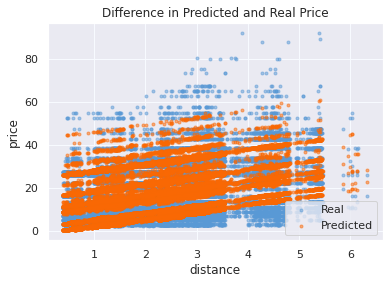

In [ ]:
lr = LinearRegression() 
model = lr.fit(X_l_train, y_l_train)
y_l_prediction = model.predict(X_l_test)
lr_train_r2_l = lr.score(X_l_train, y_l_train)
lr_test_r2_l = lr.score(X_l_test, y_l_test)
print('Linear Regression Lyft train R squared: %.4f' % lr_train_r2_l)
print('Linear Regression Lyft test R squared: %.4f' % lr_test_r2_l)

lr_mse_l = mean_squared_error(y_l_prediction, y_l_test)
lr_rmse_l = np.sqrt(lr_mse_l)
print('Linear Regression Lyft test RMSE: %.4f' % lr_rmse_l)

errors = abs(y_l_prediction - y_l_test)
mape = 100 * (errors / y_l_test)
accuracy_lr_l = 100 - np.mean(mape)
print('Lyft Accuracy:', round(accuracy_lr_l, 2), '%.')

# Define x axis
x_axis = X_l_test.distance 

# Build scatterplot
plt.scatter(x_axis, y_l_test, c = '#5999D5', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_l_prediction, c = '#FA6804', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#f7faff', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()


## 4.2 Lasso Regression

## Lasso Regression: Uber

0.0034083269853838194
LASSO Uber train R squared is: 0.9213
LASSO Uber test R squared is: 0.9203
LASSO Uber test RMSE: 2.4152
LASSO Uber Accuracy: 88.41 %.


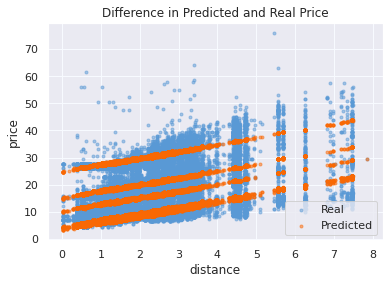

In [ ]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
lasso_model_u = LassoCV(cv=cv)

#fit model
lasso_model_u.fit(X_u_train, y_u_train)
y_u_prediction = lasso_model_u.predict(X_u_test)

#display lambda that produced the lowest test MSE
print(lasso_model_u.alpha_)
lasso_train_r2_u = lasso_model_u.score(X_u_train,y_u_train)
lasso_test_r2_u = lasso_model_u.score(X_u_test,y_u_test)
print('LASSO Uber train R squared is: %.4f' % lasso_train_r2_u)
print('LASSO Uber test R squared is: %.4f' % lasso_test_r2_u)

lasso_mse_u = mean_squared_error(y_u_prediction, y_u_test)
lasso_rmse_u = np.sqrt(lasso_mse_u)
print('LASSO Uber test RMSE: %.4f' % lasso_rmse_u)

errors = abs(y_u_prediction - y_u_test)
mape = 100 * (errors / y_u_test)
accuracy_lasso_u = 100 - np.mean(mape)
print('LASSO Uber Accuracy:', round(accuracy_lasso_u, 2), '%.')

# Define x axis
x_axis = X_u_test.distance 

# Build scatterplot
plt.scatter(x_axis, y_u_test, c = '#5999D5', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_u_prediction, c = '#FA6804', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#f7faff', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

## Lasso Regression: Lyft

0.003962631793299109
LASSO Lyft train R squared is: 0.9382
LASSO Lyft test R squared is: 0.9386
LASSO Lyft test RMSE: 2.4818
LASSO Lyft Accuracy: 85.27 %.


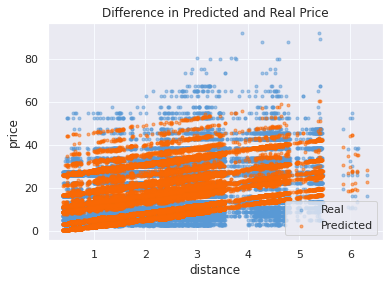

In [ ]:
#cv
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
lasso_model_l = LassoCV(cv=cv)

#fit model
lasso_model_l.fit(X_l_train, y_l_train)
y_l_prediction = lasso_model_l.predict(X_l_test)

#display lambda that produced the lowest test MSE
print(lasso_model_l.alpha_)
lasso_train_r2_l = lasso_model_l.score(X_l_train,y_l_train)
lasso_test_r2_l = lasso_model_l.score(X_l_test,y_l_test)
print('LASSO Lyft train R squared is: %.4f' % lasso_train_r2_l)
print('LASSO Lyft test R squared is: %.4f' % lasso_test_r2_l)

lasso_mse_l = mean_squared_error(y_l_prediction, y_l_test)
lasso_rmse_l = np.sqrt(lasso_mse_l)
print('LASSO Lyft test RMSE: %.4f' % lasso_rmse_l)

errors = abs(y_l_prediction - y_l_test)
mape = 100 * (errors / y_l_test)
accuracy_lasso_l = 100 - np.mean(mape)
print('LASSO Lyft Accuracy:', round(accuracy_lasso_l, 2), '%.')

# Define x axis
x_axis = X_l_test.distance 

# Build scatterplot
plt.scatter(x_axis, y_l_test, c = '#5999D5', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_l_prediction, c = '#FA6804', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#f7faff', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

## 4.3 Random Forest

## Random Forest: Uber

Random Forest Uber train R squared is: 0.9817
Random Forest Uber test R squared": 0.9414
Random Forest Uber RMSE: 2.0703
Random Forest Uber Accuracy: 91.2 %.


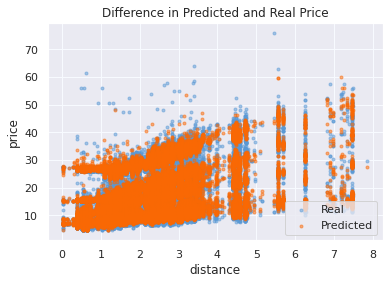

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_u_train, y_u_train)
rf_train_r2_u = rf.score(X_u_train,y_u_train)
rf_test_r2_u = rf.score(X_u_test, y_u_test)
print('Random Forest Uber train R squared is: %.4f' % rf_train_r2_u)
print('Random Forest Uber test R squared": %.4f' % rf_test_r2_u)

y_u_predictions = rf.predict(X_u_test)
rf_mse_u = mean_squared_error(y_u_predictions, y_u_test)
rf_rmse_u = np.sqrt(rf_mse_u)
print('Random Forest Uber RMSE: %.4f' % rf_rmse_u)

errors = abs(y_u_predictions - y_u_test)
mape = 100 * (errors / y_u_test)
accuracy_rf_u = 100 - np.mean(mape)
print('Random Forest Uber Accuracy:', round(accuracy_rf_u, 2), '%.')

# Define x axis
x_axis = X_u_test.distance 

# Build scatterplot
plt.scatter(x_axis, y_u_test, c = '#5999D5', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_u_predictions, c = '#FA6804', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#f7faff', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

## Random Forest: Lyft

Random Forest Lyft train R squared is: 0.9966
Random Forest Lyft test R squared": 0.9795
Random Forest Lyft RMSE: 1.4321
Random Forest Lyft Accuracy: 92.02 %.


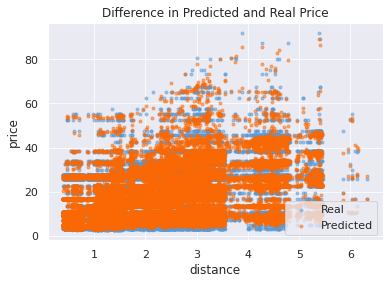

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_l_train, y_l_train)
rf_train_r2_l = rf.score(X_l_train,y_l_train)
rf_test_r2_l = rf.score(X_l_test, y_l_test)
print('Random Forest Lyft train R squared is: %.4f' % rf_train_r2_l)
print('Random Forest Lyft test R squared": %.4f' % rf_test_r2_l)

y_l_predictions = rf.predict(X_l_test)
rf_mse_l = mean_squared_error(y_l_predictions, y_l_test)
rf_rmse_l = np.sqrt(rf_mse_l)
print('Random Forest Lyft RMSE: %.4f' % rf_rmse_l)

errors = abs(y_l_predictions - y_l_test)
mape = 100 * (errors / y_l_test)
accuracy_rf_l = 100 - np.mean(mape)
print('Random Forest Lyft Accuracy:', round(accuracy_rf_l, 2), '%.')

# Define x axis
x_axis = X_l_test.distance 

# Build scatterplot
plt.scatter(x_axis, y_l_test, c = '#5999D5', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_l_predictions, c = '#FA6804', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#f7faff', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

# 5. Result Analysis

In [ ]:
Uber_result = {"Model": ["Linear Regression", "LASSO", "Random Forest"], 
"Train R2": [lr_train_r2_u, lasso_train_r2_u, rf_train_r2_u],
"Test R2": [lr_test_r2_u, lasso_test_r2_u, rf_test_r2_u],
"Test RMSE": [lr_rmse_u, lasso_rmse_u, rf_rmse_u],
"Accuracy": [accuracy_lr_u, accuracy_lasso_u, accuracy_rf_u]}

Lyft_result = {"Model": ["Linear Regression", "LASSO", "Random Forest"], 
"Train R2": [lr_train_r2_l, lasso_train_r2_l, rf_train_r2_l],
"Test R2": [lr_test_r2_l, lasso_test_r2_l, rf_test_r2_l],
"Test RMSE": [lr_rmse_l, lasso_rmse_l, rf_rmse_l],
"Accuracy": [accuracy_lr_l, accuracy_lasso_l, accuracy_rf_l]}

Uber_summary = pd.DataFrame(Uber_result)
display(Uber_summary)
Lyft_summary = pd.DataFrame(Lyft_result)
display(Lyft_summary)

,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Linear Regression,0.921380,0.920331,2.414435,88.392618
1,LASSO,0.921328,0.920279,2.415226,88.408235
2,Random Forest,0.981717,0.941423,2.070318,91.202115


,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Linear Regression,0.938257,0.938642,2.480325,85.233820
1,LASSO,0.938179,0.938569,2.481807,85.272429
2,Random Forest,0.996622,0.979546,1.432074,92.022425
